<a href="https://colab.research.google.com/github/lidiapsp/RFM-Analysis-for-Customer-Segmentation/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Background

Today's date is May 31, 2023, and you're a data analyst at RevoBank, a bank based in Europe. You're currently working with the Performance Management (PM) team, whose goal is to encourage existing customers to use RevoBank credit card products more.
You've received a data summary from the MIS (Management Information System) team, detailing clients and their sales over the last three years (36 months). Your manager has tasked you with summarizing the sales performance from the past three years and creating user personas based on the existing clients.


# Dataset Overview

The dataset contains client sales data from June 1, 2020, to May 31, 2023, covering a total of 12,559 rows and 11 columns. It represents various aspects of user behavior, categorized into:


*   User information: account_id, MOB, flag_female, birth_date
*   User classification: account_activity_level, customer_value_level
*   Behavioral features: avg_sales_L36M, cnt_sales_L36M, last_sales, month_since_last_sales, count_direct_promo_L12M




[Sales Dataset](https://drive.google.com/file/d/1WbifsFzJlo7XjULVy69BTpNxLQDqI-Pw/view?usp=share_link)


**Disclaimer**

This dataset is a simulated dataset created for educational and analytical purposes. It does not contain real customer data and should not be used for actual business decisions. Any resemblance to real individuals or transactions is purely coincidental.


# Importing library

In [ ]:
# Import pandas library to read the dataset files in a dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [ ]:
# Install gdown library
!pip install gdown

In [ ]:
# Import gdown library
import gdown

In [ ]:
# Downloading data from drive
url = 'https://drive.google.com/file/d/1WbifsFzJlo7XjULVy69BTpNxLQDqI-Pw/view?usp=sharing'
output = 'sales_data.csv' #nama untuk simpan data
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1WbifsFzJlo7XjULVy69BTpNxLQDqI-Pw
To: /content/sales_data.csv
100%|██████████| 685k/685k [00:00<00:00, 42.9MB/s]


'sales_data.csv'

In [ ]:
# Import it and store it as "df" variable
#pd.read_csv for reading the csv file
df = pd.read_csv('sales_data.csv')
df.head()

account_id account_activity_level customer_value_level    MOB  flag_female  \
0   100000006                      X                    A   91.0            0   
1   100000038                      X                    A   69.0            0   
2   100000382                      X                    A  123.0            1   
3   100000612                      X                    A   84.0            1   
4   100000757                      X                    A   40.0            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M  birth_date  
0                        5  1996-11-03  
1                       10  1971-04-24  
2                        6  1953-01-16  
3                        7  1997-06-07  
4                        5  1989-09-13

In [ ]:
# make a df copy
df_copy = df.copy()

In [ ]:
df_copy.head()

account_id account_activity_level customer_value_level    MOB  flag_female  \
0   100000006                      X                    A   91.0            0   
1   100000038                      X                    A   69.0            0   
2   100000382                      X                    A  123.0            1   
3   100000612                      X                    A   84.0            1   
4   100000757                      X                    A   40.0            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M  birth_date  
0                        5  1996-11-03  
1                       10  1971-04-24  
2                        6  1953-01-16  
3                        7  1997-06-07  
4                        5  1989-09-13

# Identifying dirty data

Quick inspection on data using head and tail function

In [ ]:
#checking data using head function to get first 30 row on our data
df.head(30)

account_id account_activity_level customer_value_level    MOB  \
0    100000006                      X                    A   91.0   
1    100000038                      X                    A   69.0   
2    100000382                      X                    A  123.0   
3    100000612                      X                    A   84.0   
4    100000757                      X                    A   40.0   
5    100000932                      X                    A   45.0   
6    100000996                      X                    A  105.0   
7    100001201                      X                    A   41.0   
8    100001304                      X                    A  126.0   
9    100001339                      X                    A   70.0   
10   100001496                      X                    A   52.0   
11   100001524                      X                    A   29.0   
12   100001603                      X                    A   81.0   
13   100001640                      X                    A   57.0   
14   100001673                      X                    A   41.0   
15   100001700                      X                    A  127.0   
16   100001915                      X                    A  105.0   
17   100001939                      X                    A   69.0   
18   100002213                      Z                    A   18.0   
19   100002226                      Z                    A   24.0   
20   100002320                      Z                    A   20.0   
21   100002327                      Z                    A   20.0   
22   100002364                      Z                    A   21.0   
23   100002370                      Z                    A  110.0   
24   100002468                      X                    A  109.0   
25   100002499                      X                    A  124.0   
26   100002547                      X                    A   61.0   
27   100002558                      Y                    B   79.0   
28   100003036                      X                    A   76.0   
29   100003193                      X                    A  123.0   

    flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0             0         25000.0               1     25000.0   
1             0          9000.0               5     10000.0   
2             1         17330.0               6     20000.0   
3             1         25830.0               6     25000.0   
4             0         25000.0               3     25000.0   
5             1          9000.0               4     10000.0   
6             1         10000.0               5     10000.0   
7             0         25000.0               2     25000.0   
8             1         17500.0               2     20000.0   
9             1          9800.0               4     10000.0   
10            0         25000.0               1     25000.0   
11            0         16670.0               3     20000.0   
12            1         10400.0               5     10000.0   
13            1         25000.0               2     25000.0   
14            1          9000.0               5     10000.0   
15            0         26250.0               4     25000.0   
16            1         16670.0               3     20000.0   
17            1         18330.0               3     20000.0   
18            0         15000.0               2     15000.0   
19            1         15000.0               1     15000.0   
20            0         15000.0               1     15000.0   
21            0         25000.0               1     25000.0   
22            0         15000.0               1     15000.0   
23            0             NaN               0     15000.0   
24            0          5000.0               1      5000.0   
25            1         25000.0               2     25000.0   
26            0             NaN               0     15000.0   
27            1         17000.0               4     20000.0   
28            1         25000.0      

In [ ]:
#checking data using tail function to get last 30 row on our data
df.tail(30)

account_id account_activity_level customer_value_level    MOB  \
12529   101058211                      Z                    E   17.0   
12530   101058258                      Z                    E   17.0   
12531   101058282                      Z                    E   16.0   
12532   101058290                      Z                    E   17.0   
12533   101058331                      Z                    E   55.0   
12534   101058396                      Y                    E   52.0   
12535   101058471                      X                    E  125.0   
12536   101058476                      X                    E   75.0   
12537   101058508                      Y                    E  128.0   
12538   101058522                      X                    E  101.0   
12539   101058696                      X                    E   77.0   
12540   101058907                      X                    E  111.0   
12541   101059052                      X                    E  117.0   
12542   101059078                      X                    E  113.0   
12543   101059132                      X                    E   89.0   
12544   101059142                      X                    E   90.0   
12545   101059250                      X                    E   77.0   
12546   101059284                      X                    E   46.0   
12547   101059349                      X                    E   30.0   
12548   101059507                      X                    E   33.0   
12549   101059803                      X                    E  129.0   
12550   101059840                      X                    E  127.0   
12551   101059841                      X                    E   41.0   
12552   101059875                      Z                    E   24.0   
12553   101059893                      Z                    E   24.0   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
12529            0         15000.0               1     15000.0   
12530            1         15000.0               1     15000.0   
12531            1         15000.0               1     15000.0   
12532            0         15000.0               1     15000.0   
12533            1             NaN               0     15000.0   
12534            1          9000.0               7     10000.0   
12535            1         10000.0               2     10000.0   
12536            0         16670.0               3     20000.0   
12537            0          5000.0               2      5000.0   
12538            1          5000.0               5      5000.0   
12539            1         17250.0               5     20000.0   
12540            0          5000.0               4      5000.0   
12541            1         25000.0               1     25000.0   
12542            1          8250.0               4     10000.0   
12543            0          8670.0               3     10000.0   
12544            0         17500.0               3     20000.0   
12545            1          9500.0               4     10000.0   
12546            1         10000.0               4     10000.0   
12547            1         26670.0               3     25000.0   
12548            1          5330.0               6      5000.0   
12549            1         18330.0               3     20000.0   
12550            1          8500.0               3     10000.0   
12551            0         17500.0               3     20000.0   
12552            0         20000.0               1     20000.0   
12553            1         15000.0               2     15000.0   
12554            1         15000.0               1     150

Di dataset ini, terlihat bahwa:
1. MOB adalah lamanya waktu (dalam bulan) seorang nasabah telah menjadi pelanggan bank nilainya mengandung decimal
2. Missing value pada avg_sales_L36M yang diidentifikasi dengan NaN yang berpola yang sama yaitu cnt_sales_L36M= 0, tidak perlu dihapus karena memiliki arti dalam 36 bulan terakhir tidak ada pembelian produk yang dilakukan

# Checking data type on each column

Berdasarkan data dictionary terdapat 2 data yang berisi level categorical variable yaitu:


1. account_activity_level
2. customer_value_level

berikut data dictionarynya:
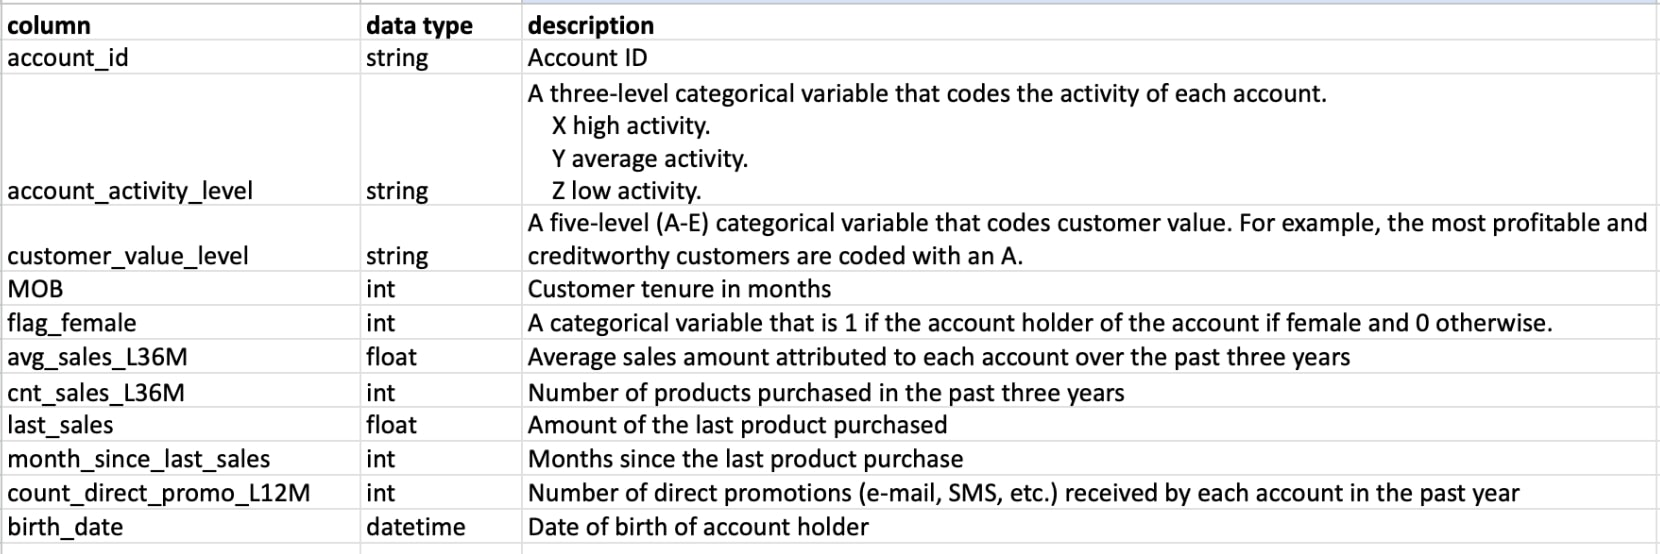




Inspect the data type on each column

In [ ]:
#checking data type using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12559 non-null  int64  
 1   account_activity_level   12559 non-null  object 
 2   customer_value_level     12559 non-null  object 
 3   MOB                      12559 non-null  float64
 4   flag_female              12559 non-null  int64  
 5   avg_sales_L36M           11820 non-null  float64
 6   cnt_sales_L36M           12559 non-null  int64  
 7   last_sales               12559 non-null  float64
 8   month_since_last_sales   12559 non-null  int64  
 9   count_direct_promo_L12M  12559 non-null  int64  
 10  birth_date               12559 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


jika dibandingkan dengan data dictionary:
1. account_id bertype int harusnya bertype str
2. MOB bertype float padahal isinya merupakan data lama waktu nasabah memegang akunnya harusnya bertype int
3. birth_date bertype object harusnya karena  tanggal harus bertype datetime

# Checking typo

Inspect typo on all column without exception

In [ ]:
# indentifying typo on all column without exception
# 1. Ambil nama-nama kolom di df.columns
# 2. Lakukan iterasi di setiap nama kolom tadi
print(df.columns)

# Misal setiap nama kolom di df.columns, kita print value_counts()-nya.
for column in df.columns:
    print(df[column].value_counts())
    print('\n')

Index(['account_id', 'account_activity_level', 'customer_value_level', 'MOB',
       'flag_female', 'avg_sales_L36M', 'cnt_sales_L36M', 'last_sales',
       'month_since_last_sales', 'count_direct_promo_L12M', 'birth_date'],
      dtype='object')
account_id
100784337    2
100620958    2
100964649    2
100685883    2
100077493    2
            ..
100344145    1
100344200    1
100344250    1
100344285    1
100343468    1
Name: count, Length: 12487, dtype: int64


account_activity_level
X      8238
Z      3442
Y       878
XYZ       1
Name: count, dtype: int64


customer_value_level
E    4480
B    2390
A    2204
C    2003
D    1481
F       1
Name: count, dtype: int64


MOB
17.0     663
16.0     568
21.0     489
20.0     388
24.0     344
        ... 
283.0      1
151.0      1
232.0      1
143.0      1
154.0      1
Name: count, Length: 128, dtype: int64


flag_female
1    6807
0    5752
Name: count, dtype: int64


avg_sales_L36M
25000.0    2050
20000.0    1742
10000.0    1699
15000.0    1431

Karena semua type kolom ditampilkan sehingga kolom yang mengandung unique value pun ikut muncul,untuk mempermudah pengecekan kita dapat menggunakan function yang dapat menyeleksi kolom yang mengandung angka

Inspect typo on non-numeric column

In [ ]:
# Identifying typo using .select_dtype to exclude the column that contain numbers
for column in df.select_dtypes(exclude='number').columns:
    print(df[column].value_counts(), '\n')

account_activity_level
X      8238
Z      3442
Y       878
XYZ       1
Name: count, dtype: int64 

customer_value_level
E    4480
B    2390
A    2204
C    2003
D    1481
F       1
Name: count, dtype: int64 

birth_date
1955-04-03    8
1957-01-15    7
1954-02-01    7
1951-11-03    6
1952-12-27    6
             ..
1966-06-13    1
1952-03-18    1
1955-10-26    1
1973-09-04    1
1997-06-07    1
Name: count, Length: 8702, dtype: int64 



di dataset ini terlihat bahwa:
1.   account_activity_level mengandung 4 level kategori, kategori XYZ harus dihapus
2.   customer_value_level mengandung 6 level kategori, kategori F harus dihapus
3. karena birth_date belum diubah typenya menjadi datetime jadi masih terdeteksi sebagai str



# Checking missing values

Identifying missing values on each column

In [ ]:
# Inspect missing values using .isnull function
df.isnull(). sum()

account_id                   0
account_activity_level       0
customer_value_level         0
MOB                          0
flag_female                  0
avg_sales_L36M             739
cnt_sales_L36M               0
last_sales                   0
month_since_last_sales       0
count_direct_promo_L12M      0
birth_date                   0
dtype: int64

di dataset terlihat bahwa hanya kolom avg_sales_L36M yang memiliki missing value yang terindentifikasi NaN, mari kita zoom dengan menggunakan kondisi untuk mendeteksi baris yang mengandung NaN pada kolom avg_sales_L36M

In [ ]:
#showing row that contain NaN on avg_sales_L36M column using condition
condition = df['avg_sales_L36M'].isnull()
df[condition]

account_id account_activity_level customer_value_level    MOB  \
23      100002370                      Z                    A  110.0   
26      100002547                      X                    A   61.0   
37      100003731                      X                    A   54.0   
59      100005474                      Z                    A   56.0   
86      100008094                      X                    B  127.0   
...           ...                    ...                  ...    ...   
12492   101054957                      Z                    E   51.0   
12501   101055421                      X                    E   54.0   
12504   101055837                      Z                    E   51.0   
12521   101057435                      X                    E  123.0   
12533   101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             NaN               0     15000.0   
26               0             NaN               0     15000.0   
37               1             NaN               0     15000.0   
59               0             NaN               0     15000.0   
86               1             NaN               0     15000.0   
...            ...             ...             ...         ...   
12492            1             NaN               0     15000.0   
12501            0             NaN               0     15000.0   
12504            0             NaN               0     15000.0   
12521            0             NaN               0     15000.0   
12533            1             NaN               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
23                         56                        3  1972-08-18  
26                         61                        3  1987-07-24  
37                         54                        6  1954-03-30  
59                         56                        2  1971-04-11  
86                         53                        3  1983-07-12  
...                       ...                      ...         ...  
12492                      51                        3  1993-01-22  
12501                      52                        5  1949-04-26  
12504                      51                        3  1990-08-30  
12521                      53                        5  1957-05-23  
12533                      55                        2  1949-03-26  

[739 rows x 11 columns]

di dataset terlihat bahwa setiap kolom avg_sales_L36M = NaN, memilki cnt_sales_L36M = 0
artinya akun tersebut tidak melakukan pembelian produk selama 36 bulan terakhir sehingga rata rata sales selama 36 bulan terakhir tidak terdeteksi, NaN pada data ini bisa di replace menjadi 0 untuk memberi value pada data dan memudahkan perhitungan

# Checking Duplicates

Inspect duplicates row on all column

In [ ]:
#check the duplicate pair by using parameter "keep=False" to keep the false (non duplicates row) and show the true (duplicates row)
df[df.duplicated(keep=False)]

account_id account_activity_level customer_value_level    MOB  \
145     100013585                      X                    E   45.0   
146     100013585                      X                    E   45.0   
384     100032321                      Z                    D   21.0   
385     100032321                      Z                    D   21.0   
568     100046628                      X                    E   41.0   
...           ...                    ...                  ...    ...   
12252   101034135                      X                    B  131.0   
12325   101040513                      X                    C   29.0   
12326   101040513                      X                    C   29.0   
12387   101045687                      X                    E   93.0   
12388   101045687                      X                    E   93.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
145              1         20000.0               3     20000.0   
146              1         20000.0               3     20000.0   
384              0         15000.0               1     15000.0   
385              0         15000.0               1     15000.0   
568              1          9170.0               6     10000.0   
...            ...             ...             ...         ...   
12252            1         10000.0               3     10000.0   
12325            1          9000.0               5     10000.0   
12326            1          9000.0               5     10000.0   
12387            1         17000.0               3     20000.0   
12388            1         17000.0               3     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
145                        22                        6  1978-11-13  
146                        22                        6  1978-11-13  
384                        21                        3  1946-12-25  
385                        21                        3  1946-12-25  
568                        15                        6  1959-09-08  
...                       ...                      ...         ...  
12252                      16                        6  1947-05-29  
12325                      16                        7  1972-06-30  
12326                      16                        7  1972-06-30  
12387                      25                        7  1951-04-15  
12388                      25                        7  1951-04-15  

[144 rows x 11 columns]

terdapat 144 rows yang terdeksi duplikat, dan kita harus menghapus row duplikat itu karena jika dilihat dari karakteristik data, data kita adalah rekap sales dari masing -masing nasabah dalam kurun waktu 36 bulan terakhir sehingga account_id hanya boleh terdeteksi 1 kali/unique value karena setiap row sudah mengandung history dari masing-masing akun, rata-rata sales dll

Indentifying duplicates data only on columns that suppose to contain unique values

In [ ]:
#inspect duplicates data using on columns that contain unique values using. keep parameter and subset
#'account_id','birth_date'as a parameter columns to lookup to identify the duplicates row
#true= duplicate value, false= non-duplikat value, keep=false adalah ingkar false berarti true value yan akan shown
df[df.duplicated(keep=False, subset=['account_id','birth_date'])]

account_id account_activity_level customer_value_level    MOB  \
145     100013585                      X                    E   45.0   
146     100013585                      X                    E   45.0   
384     100032321                      Z                    D   21.0   
385     100032321                      Z                    D   21.0   
568     100046628                      X                    E   41.0   
...           ...                    ...                  ...    ...   
12252   101034135                      X                    B  131.0   
12325   101040513                      X                    C   29.0   
12326   101040513                      X                    C   29.0   
12387   101045687                      X                    E   93.0   
12388   101045687                      X                    E   93.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
145              1         20000.0               3     20000.0   
146              1         20000.0               3     20000.0   
384              0         15000.0               1     15000.0   
385              0         15000.0               1     15000.0   
568              1          9170.0               6     10000.0   
...            ...             ...             ...         ...   
12252            1         10000.0               3     10000.0   
12325            1          9000.0               5     10000.0   
12326            1          9000.0               5     10000.0   
12387            1         17000.0               3     20000.0   
12388            1         17000.0               3     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
145                        22                        6  1978-11-13  
146                        22                        6  1978-11-13  
384                        21                        3  1946-12-25  
385                        21                        3  1946-12-25  
568                        15                        6  1959-09-08  
...                       ...                      ...         ...  
12252                      16                        6  1947-05-29  
12325                      16                        7  1972-06-30  
12326                      16                        7  1972-06-30  
12387                      25                        7  1951-04-15  
12388                      25                        7  1951-04-15  

[144 rows x 11 columns]

jika kita melihat duplicates value dengan menjadikan kolom-kolom yang harusnya berisi unique value sebagai parameter kita, ditemukan terdapat 144 rows, artinya 72 rows harus dihapus

## Findings after Inspecting Dirty Date

| Findings | Action Plan |
|---|---|
|1. account_id bertype int | ganti menjadi str |
|2. MOB bertype float padahal isinya merupakan data lama waktu (dalam bulan) nasabah memegang akunnya | ganti menjadi int |
|3. birth_date bertype object padahal data berisi tanggal | ganti menjadi datetime |
|4. account_activity_level mengandung 4 level kategori harusnya hanya 3 level | kategori XYZ harus dihapus |
|5. customer_value_level mengandung 6 level kategori harusnya hanya 5 level | kategori F harus dihapus |
|6. missing value pada avg_sales_L36M yang diidentifikasi dengan NaN yang berpola yang sama yaitu memiliki cnt_sales_L36M= 0 | tidak perlu dihapus karena memiliki arti dalam 36 bulan terakhir tidak ada pembelian produk yang dilakukan dan bisa di isi dengan value=0 untuk mempermudah perhitungan dalam analisis selanjutnya |
|7. terdapat 144 row yang memiliki duplikat identik pada tiap kolomnya dan jika menjadikan  kolom account_id sebagai parameter (karena berisi unique value) terdapat duplikat = 144 rows | hapus 72 rows yang menjadi data duplikat karena karakteristik dataset ini tidak boleh memiliki duplikat pada unique value column |

# Data Cleaning

let's copy our data before doing any operations or manipulations.

In [ ]:
# copy dataframe to a new dataframe
backup1 = df.copy()

# Handling missing values

when we check the data pattern, we find that where avg_sales_L36M = NaN always correspond to cnt_sales_L36M = 0 its means when a particular  account hasn't made any purchases in the L36M (cnt_sales_L36M = 0) there is no average sales amount because they haven't spent any money with us (avg_sales_L36M =NaN), we suggest to fill the missing value in avg_sales_L36M = 0 To simplify future calculations.


In [ ]:
condition = df[df['avg_sales_L36M']. isnull ()]
condition

account_id account_activity_level customer_value_level    MOB  \
23      100002370                      Z                    A  110.0   
26      100002547                      X                    A   61.0   
37      100003731                      X                    A   54.0   
59      100005474                      Z                    A   56.0   
86      100008094                      X                    B  127.0   
...           ...                    ...                  ...    ...   
12492   101054957                      Z                    E   51.0   
12501   101055421                      X                    E   54.0   
12504   101055837                      Z                    E   51.0   
12521   101057435                      X                    E  123.0   
12533   101058331                      Z                    E   55.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
23               0             NaN               0     15000.0   
26               0             NaN               0     15000.0   
37               1             NaN               0     15000.0   
59               0             NaN               0     15000.0   
86               1             NaN               0     15000.0   
...            ...             ...             ...         ...   
12492            1             NaN               0     15000.0   
12501            0             NaN               0     15000.0   
12504            0             NaN               0     15000.0   
12521            0             NaN               0     15000.0   
12533            1             NaN               0     15000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
23                         56                        3  1972-08-18  
26                         61                        3  1987-07-24  
37                         54                        6  1954-03-30  
59                         56                        2  1971-04-11  
86                         53                        3  1983-07-12  
...                       ...                      ...         ...  
12492                      51                        3  1993-01-22  
12501                      52                        5  1949-04-26  
12504                      51                        3  1990-08-30  
12521                      53                        5  1957-05-23  
12533                      55                        2  1949-03-26  

[739 rows x 11 columns]

In [ ]:
# fillna(value), every missing values on the avg_sales_L36M will be fill with 0 as we suggest before
df['avg_sales_L36M'] = df['avg_sales_L36M'].fillna(0)

In [ ]:
df.tail(30)

account_id account_activity_level customer_value_level    MOB  \
12529   101058211                      Z                    E   17.0   
12530   101058258                      Z                    E   17.0   
12531   101058282                      Z                    E   16.0   
12532   101058290                      Z                    E   17.0   
12533   101058331                      Z                    E   55.0   
12534   101058396                      Y                    E   52.0   
12535   101058471                      X                    E  125.0   
12536   101058476                      X                    E   75.0   
12537   101058508                      Y                    E  128.0   
12538   101058522                      X                    E  101.0   
12539   101058696                      X                    E   77.0   
12540   101058907                      X                    E  111.0   
12541   101059052                      X                    E  117.0   
12542   101059078                      X                    E  113.0   
12543   101059132                      X                    E   89.0   
12544   101059142                      X                    E   90.0   
12545   101059250                      X                    E   77.0   
12546   101059284                      X                    E   46.0   
12547   101059349                      X                    E   30.0   
12548   101059507                      X                    E   33.0   
12549   101059803                      X                    E  129.0   
12550   101059840                      X                    E  127.0   
12551   101059841                      X                    E   41.0   
12552   101059875                      Z                    E   24.0   
12553   101059893                      Z                    E   24.0   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
12529            0         15000.0               1     15000.0   
12530            1         15000.0               1     15000.0   
12531            1         15000.0               1     15000.0   
12532            0         15000.0               1     15000.0   
12533            1             0.0               0     15000.0   
12534            1          9000.0               7     10000.0   
12535            1         10000.0               2     10000.0   
12536            0         16670.0               3     20000.0   
12537            0          5000.0               2      5000.0   
12538            1          5000.0               5      5000.0   
12539            1         17250.0               5     20000.0   
12540            0          5000.0               4      5000.0   
12541            1         25000.0               1     25000.0   
12542            1          8250.0               4     10000.0   
12543            0          8670.0               3     10000.0   
12544            0         17500.0               3     20000.0   
12545            1          9500.0               4     10000.0   
12546            1         10000.0               4     10000.0   
12547            1         26670.0               3     25000.0   
12548            1          5330.0               6      5000.0   
12549            1         18330.0               3     20000.0   
12550            1          8500.0               3     10000.0   
12551            0         17500.0               3     20000.0   
12552            0         20000.0               1     20000.0   
12553            1         15000.0               2     15000.0   
12554            1         15000.0               1     150

kita sudah mengisi value pada avg_sales_L36M = NaN dengan nilai = 0, kemudian kita akan menghapus baris yang duplikat

# Drop the duplicates

We identified 144 rows with identical values across all columns. When we used the account_id column as the parameter for identifying unique values, we found the same number of duplicate rows. Since the data dictionary specifies that the account_id column should contain unique values, we will remove the duplicates to ensure uniqueness.

In [ ]:
df

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
0                          26                        5  1996-11-03  
1                          25                       10  1971-04-24  
2                          18                        6  1953-01-16  
3                          14                        7  1997-06-07  
4                          17                        5  1989-09-13  
...                       ...                      ...         ...  
12554                      21                        3  1970-05-27  
12555                      19                        4  1952-03-04  
12556                      21                        4  1981-10-23  
12557                      17                        6  1975-07-21  
12558                      21                        5  1975-08-21  

[12559 rows x 11 columns]

In [ ]:
#dropping the duplicates value and saving the change
df = df.drop_duplicates()

In [ ]:
df

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
0                          26                        5  1996-11-03  
1                          25                       10  1971-04-24  
2                          18                        6  1953-01-16  
3                          14                        7  1997-06-07  
4                          17                        5  1989-09-13  
...                       ...                      ...         ...  
12554                      21                        3  1970-05-27  
12555                      19                        4  1952-03-04  
12556                      21                        4  1981-10-23  
12557                      17                        6  1975-07-21  
12558                      21                        5  1975-08-21  

[12487 rows x 11 columns]

setelah menghilangkan duplikat sebanyak 72 row, total baris sebelumnya = 12559 menjadi setelahnya = 12487

# Removing typo

During data exploration, we found two potential anomalies:

1. account_activity_level = XYZ
2. customer_value_level = F

These values appear in only one row each and do not exhibit any trend, leading us to consider them as anomalies that should be removed.

In [ ]:
# identify the value on account_activity_level
df.value_counts('account_activity_level')

account_activity_level
X      8186
Z      3426
Y       874
XYZ       1
Name: count, dtype: int64

terdeteksi 1 row anomali yang mengandung value XYZ pada kolom account_activity_level yang perlu di exclude

In [ ]:
#excluding XYZ value on account_activity_level and save the change
condition = ~(df['account_activity_level'] == 'XYZ')
df = df[condition]

In [ ]:
df

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
0                          26                        5  1996-11-03  
1                          25                       10  1971-04-24  
2                          18                        6  1953-01-16  
3                          14                        7  1997-06-07  
4                          17                        5  1989-09-13  
...                       ...                      ...         ...  
12554                      21                        3  1970-05-27  
12555                      19                        4  1952-03-04  
12556                      21                        4  1981-10-23  
12557                      17                        6  1975-07-21  
12558                      21                        5  1975-08-21  

[12486 rows x 11 columns]

In [ ]:
#checking the change
df.value_counts('account_activity_level')

account_activity_level
X    8186
Z    3426
Y     874
Name: count, dtype: int64

setelah meng-exclude 1 row yang mengandung value XYZ pada kolom account_activity_level, jumlah baris kita berubah sebelumnya = 12487 menjadi setelahnya = 12486

In [ ]:
# identify the value on customer_value_level
df.value_counts('customer_value_level')

customer_value_level
E    4452
B    2374
A    2196
C    1994
D    1469
F       1
Name: count, dtype: int64

terdeteksi 1 row anomali yang mengandung value F pada kolom customer_value_level yang perlu di exclude

In [ ]:
#excluding F value on customer_value_level and save the change
condition = ~(df['customer_value_level'] == 'F')
df = df[condition]

In [ ]:
df

account_id account_activity_level customer_value_level    MOB  \
0       100000006                      X                    A   91.0   
1       100000038                      X                    A   69.0   
2       100000382                      X                    A  123.0   
3       100000612                      X                    A   84.0   
4       100000757                      X                    A   40.0   
...           ...                    ...                  ...    ...   
12554   101059900                      Z                    E   21.0   
12555   101059915                      Z                    E   19.0   
12556   101059935                      Z                    E   21.0   
12557   101059941                      Z                    E   17.0   
12558   101060006                      Z                    E   21.0   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  birth_date  
0                          26                        5  1996-11-03  
1                          25                       10  1971-04-24  
2                          18                        6  1953-01-16  
3                          14                        7  1997-06-07  
4                          17                        5  1989-09-13  
...                       ...                      ...         ...  
12554                      21                        3  1970-05-27  
12555                      19                        4  1952-03-04  
12556                      21                        4  1981-10-23  
12557                      17                        6  1975-07-21  
12558                      21                        5  1975-08-21  

[12485 rows x 11 columns]

In [ ]:
#checking the change
df.value_counts('customer_value_level')

customer_value_level
E    4452
B    2374
A    2196
C    1994
D    1469
Name: count, dtype: int64

setelah meng-exclude 1 row yang mengandung value F pada kolom customer_value_level, jumlah baris kita berubah sebelumnya = 12486 menjadi setelahnya = 12485

# Changing the data type

After handling missing values, removing duplicates and excluding typos, it was observed that certain columns had incorrect data types. These columns and the required corrections are as follows:
1. account_id: int-> object
2. MOB: float -> int
3. birth_date: object -> datetime

In [ ]:
#backuping data again
backup2 = df.copy()

Convert account_id into a object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12485 non-null  int64  
 1   account_activity_level   12485 non-null  object 
 2   customer_value_level     12485 non-null  object 
 3   MOB                      12485 non-null  float64
 4   flag_female              12485 non-null  int64  
 5   avg_sales_L36M           12485 non-null  float64
 6   cnt_sales_L36M           12485 non-null  int64  
 7   last_sales               12485 non-null  float64
 8   month_since_last_sales   12485 non-null  int64  
 9   count_direct_promo_L12M  12485 non-null  int64  
 10  birth_date               12485 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.4+ MB


In [ ]:
# convert data type on account_id into a object
df['account_id'] = df['account_id'].astype('object')

<ipython-input-34-1a49d0093fd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_id'] = df['account_id'].astype('object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12485 non-null  object 
 1   account_activity_level   12485 non-null  object 
 2   customer_value_level     12485 non-null  object 
 3   MOB                      12485 non-null  float64
 4   flag_female              12485 non-null  int64  
 5   avg_sales_L36M           12485 non-null  float64
 6   cnt_sales_L36M           12485 non-null  int64  
 7   last_sales               12485 non-null  float64
 8   month_since_last_sales   12485 non-null  int64  
 9   count_direct_promo_L12M  12485 non-null  int64  
 10  birth_date               12485 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1.4+ MB


account_id telah diubah dari int menjadi object

In [ ]:
# convert data type on account_id into a object
df['MOB'] = df['MOB'].astype('int')

<ipython-input-36-ad02a2575863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOB'] = df['MOB'].astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12485 non-null  object 
 1   account_activity_level   12485 non-null  object 
 2   customer_value_level     12485 non-null  object 
 3   MOB                      12485 non-null  int64  
 4   flag_female              12485 non-null  int64  
 5   avg_sales_L36M           12485 non-null  float64
 6   cnt_sales_L36M           12485 non-null  int64  
 7   last_sales               12485 non-null  float64
 8   month_since_last_sales   12485 non-null  int64  
 9   count_direct_promo_L12M  12485 non-null  int64  
 10  birth_date               12485 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


MOB telah diubah dari float menjadi int

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M  birth_date  
0                        5  1996-11-03  
1                       10  1971-04-24  
2                        6  1953-01-16  
3                        7  1997-06-07  
4                        5  1989-09-13

In [ ]:
# convert data type on birth_date into a datetime since our format '%Y-%m-%d'
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')

<ipython-input-39-9bac33dc1556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_date'] = pd.to_datetime(df['birth_date'], format='%Y-%m-%d')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12485 non-null  object        
 1   account_activity_level   12485 non-null  object        
 2   customer_value_level     12485 non-null  object        
 3   MOB                      12485 non-null  int64         
 4   flag_female              12485 non-null  int64         
 5   avg_sales_L36M           12485 non-null  float64       
 6   cnt_sales_L36M           12485 non-null  int64         
 7   last_sales               12485 non-null  float64       
 8   month_since_last_sales   12485 non-null  int64         
 9   count_direct_promo_L12M  12485 non-null  int64         
 10  birth_date               12485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.4+ MB


birth_date telah diubah dari object menjadi datetime

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  
0                        5 1996-11-03  
1                       10 1971-04-24  
2                        6 1953-01-16  
3                        7 1997-06-07  
4                        5 1989-09-13

In [ ]:
df.isnull().sum()

account_id                 0
account_activity_level     0
customer_value_level       0
MOB                        0
flag_female                0
avg_sales_L36M             0
cnt_sales_L36M             0
last_sales                 0
month_since_last_sales     0
count_direct_promo_L12M    0
birth_date                 0
dtype: int64

Kita telah mengganti tipe dataset berikut menjadi:
1. account_id: int-> object
2. MOB: float -> int
3. birth_date: object -> datetime

data kita sudah di bersih, dimana jumlah data bersih kita 12485, tidak ada missing value dan correct data type, sehingga kita siap untuk melakukan analysis lebih lanjut

# Calculate client's age

Based on the client's birth date, calculate each client's age as of May 31, 2023.
For this analysis, remove any client with age less than 21. (Hint: First, calculate the age using the time difference technique covered in Day 3. Then filter the dataframe to exclude any client with an age less than 21).

Di case ini, cutoff_date kita adalah 31 Mei 2023, so to specify we use datetime(year=2023, month=5, day=31).

Umur (client_age) = cutoff_date - df['birthdate'], divide by (1, 'Y')

In [ ]:
# Import the datetime object from the datetime module
from datetime import datetime

# Define cutoff_date
cutoff_date = datetime(year=2023, month=5, day=31)

# Since age is in year, we floor divide by "Y", so // np.timedelta64(1,'Y')
df['client_age'] = round((cutoff_date - df['birth_date']).dt.days // 365)

<ipython-input-43-6cd10ce56c14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['client_age'] = round((cutoff_date - df['birth_date']).dt.days // 365)


In [ ]:
df

account_id account_activity_level customer_value_level  MOB  \
0      100000006                      X                    A   91   
1      100000038                      X                    A   69   
2      100000382                      X                    A  123   
3      100000612                      X                    A   84   
4      100000757                      X                    A   40   
...          ...                    ...                  ...  ...   
12554  101059900                      Z                    E   21   
12555  101059915                      Z                    E   19   
12556  101059935                      Z                    E   21   
12557  101059941                      Z                    E   17   
12558  101060006                      Z                    E   21   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          52  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12554                      21                        3 1970-05-27          53  
12555                      19                        4 1952-03-04          71  
12556                      21                        4 1981-10-23          41  
12557                      17                        6 1975-07-21          47  
12558                      21                        5 1975-08-21          47  

[12485 rows x 12 columns]

setelah manambahkan kolom kalkulasi client_age , kita akan meremove any client with age less than 21 using condition function

In [ ]:
#backuping data again
backup3 = df.copy()

In [ ]:
#removing any client with age less than 21 using condition function
condition = df['client_age'] >= 21
df = df[condition]

In [ ]:
df

account_id account_activity_level customer_value_level  MOB  \
0      100000006                      X                    A   91   
1      100000038                      X                    A   69   
2      100000382                      X                    A  123   
3      100000612                      X                    A   84   
4      100000757                      X                    A   40   
...          ...                    ...                  ...  ...   
12554  101059900                      Z                    E   21   
12555  101059915                      Z                    E   19   
12556  101059935                      Z                    E   21   
12557  101059941                      Z                    E   17   
12558  101060006                      Z                    E   21   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0                0         25000.0               1     25000.0   
1                0          9000.0               5     10000.0   
2                1         17330.0               6     20000.0   
3                1         25830.0               6     25000.0   
4                0         25000.0               3     25000.0   
...            ...             ...             ...         ...   
12554            1         15000.0               1     15000.0   
12555            0         20000.0               1     20000.0   
12556            0         20000.0               1     20000.0   
12557            0         20000.0               2     20000.0   
12558            1         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  
0                          26                        5 1996-11-03          26  
1                          25                       10 1971-04-24          52  
2                          18                        6 1953-01-16          70  
3                          14                        7 1997-06-07          25  
4                          17                        5 1989-09-13          33  
...                       ...                      ...        ...         ...  
12554                      21                        3 1970-05-27          53  
12555                      19                        4 1952-03-04          71  
12556                      21                        4 1981-10-23          41  
12557                      17                        6 1975-07-21          47  
12558                      21                        5 1975-08-21          47  

[12355 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int

Kolom client_age telah ditambahkan dan sudah dilakukan filter pada client yang memiliki umur dibawah 21 tahun sebanyak 130 row sehingga sebelumnya data 12485 menjadi 12355.




# EDA & Data Visualization
After doing data cleaning, we are now ready to do exploratory analysis into our data. Provide some key insights into the promo performance in the past 36 months. The best way to do this is to look at the data from multiple perspectives, answering some key business questions. Some are listed below to be your source of inspiration:

**Descriptive Statistics**

a. Calculate the total sales in the last 3 years. (Hint: Calculate total sales for each account by multiplying average sales and sales count in the past 3 years. Then, sum all total sales using .sum ())

b. Identify the number of clients with no sales in the past 36 months. What percentage does this represent compared to the total number of clients? (Hint: Use loc to filter clients with total sales =
O. Then use .info() or other functions to calculate the number of such clients. Use a pie chart to visualize your result. You might want to create new column stating whether the clients have sales or not)

c. In the data dictionary, the account activity level "X" is said to be the most active transacting compared to other levels. Is it true? Present your findings in a data visualization. (Hint: Group by account activity level and calculate median months since the last transaction from each level.
Additionally, calculate the average number of transactions in the past 3 years for each level. Use a bar chart to present the result.)

d. Is it true that male clients generate higher profits compared to female clients? (Hint: Group by female flag and use aggregate statistics to check the difference of profitability between male and female clients. Hence, you need to calculate the profit first. Also, the "profit" referred here is the profit per client, not the total profit. Use boxplots to present your result)

**Insight & Recommendations**

e. Calculate the proportion of total sales in the past 3 years based on generations (Boomer, Gen-X Millenial, Gen-Z, Gen-Alpha). Does the total sales skew toward a certain demographic group? If so, what is your recommendation for the bank to improve sales performance? Present your findings in a data visualization. (Hint: Use.dt.year to extract the year of birth from the birth date, then use pd.cut to categorize the year into generations. In presenting the result, you can also add the breakdown of the total sales: avg sales amount, and count of sales)

f. Is there a relationship between increasing the number of email and SMS messages and improved total sales performance? If so, what is your recommendation for the bank to improve its sales performance? Present your findings in a line chart. (Hint: Group the specific data by promo communication count and calculate the total sales per customer in each group. "Specific data" is mentioned because you might select any specific pattern based on any column.)

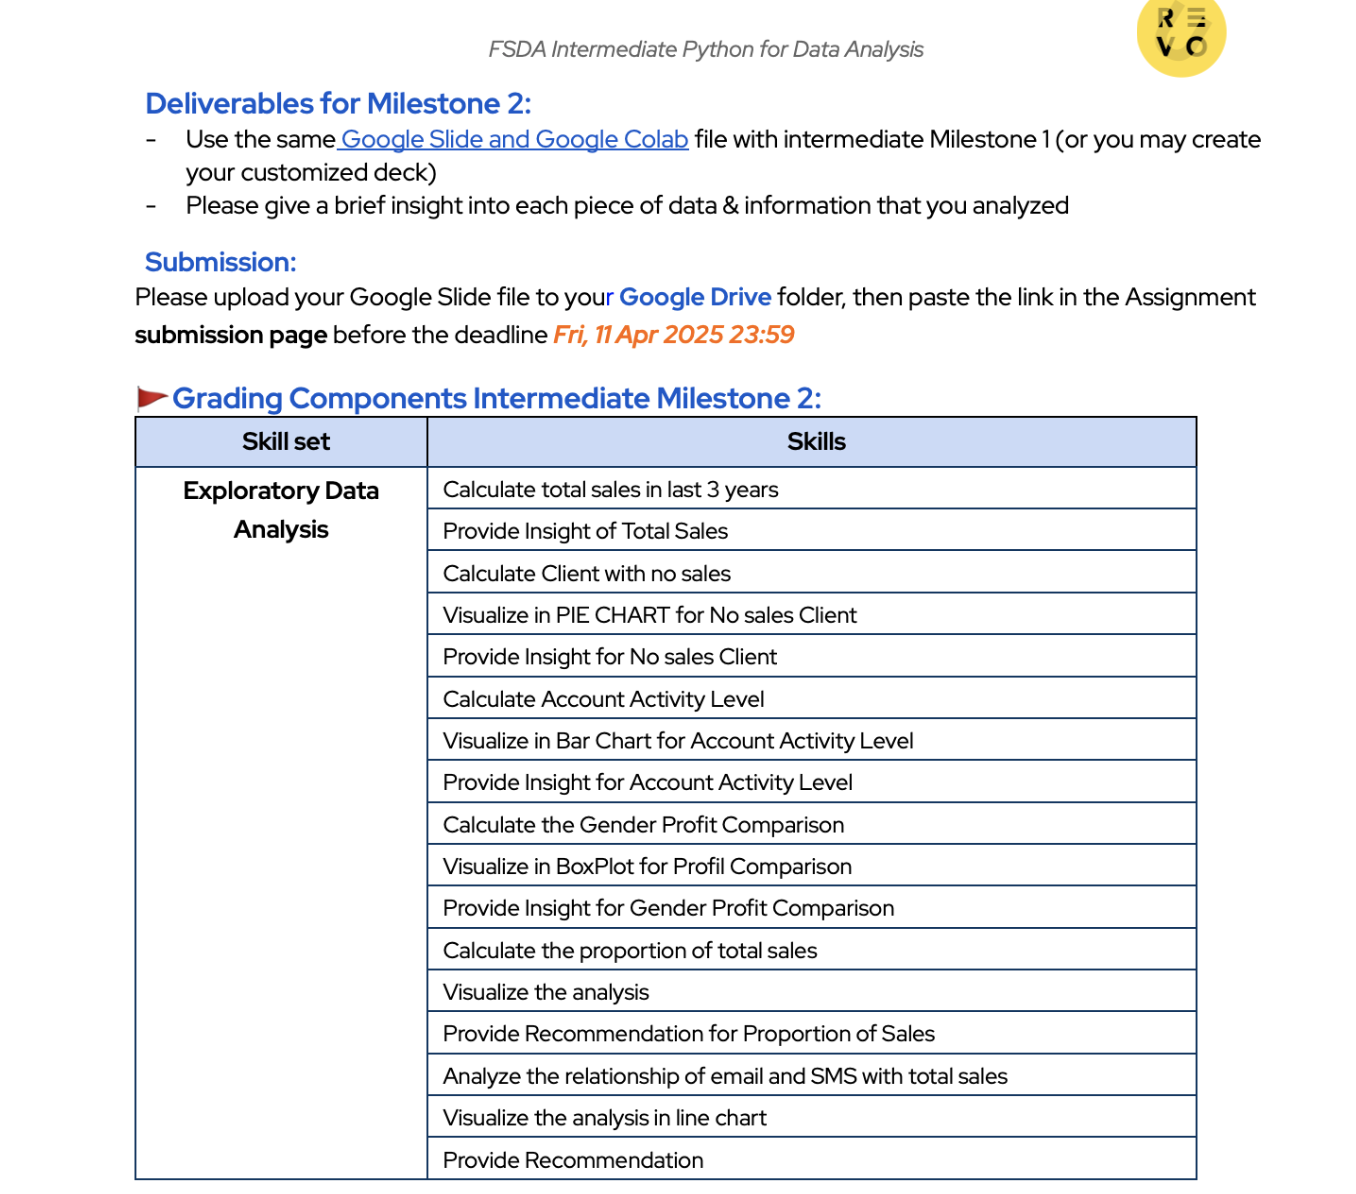

# Data Grouping and Descriptive Statistics

After doing data cleaning, we are now ready to do exploratory analysis

# 1. Calculate the total sales in the last 3 years.

  total sales = SUM (average sales for each account X  sales count in the past 3 years for each account)

In [ ]:
#backuping data again
backup4 = df.copy()

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  
0                        5 1996-11-03          26  
1                       10 1971-04-24          52  
2                        6 1953-01-16          70  
3                        7 1997-06-07          25  
4                        5 1989-09-13          33

In [ ]:
# Step 1: calculate total sales = avg_sales_L36M * cnt_sales_l36M
df['total_sales_L36M'] = (df['avg_sales_L36M'] * df['cnt_sales_L36M'])

<ipython-input-51-f7c9ea38bfb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales_L36M'] = (df['avg_sales_L36M'] * df['cnt_sales_L36M'])


In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  
0                        5 1996-11-03          26           25000.0  
1                       10 1971-04-24          52           45000.0  
2                        6 1953-01-16          70          103980.0  
3                        7 1997-06-07          25          154980.0  
4                        5 1989-09-13          33           75000.0

In [ ]:
#calculate overall total sales
total_sales = df['total_sales_L36M'].sum()
print(f"The total sales for all 12,355 clients in the last 3 years is {total_sales} euros.")

The total sales for all 12,355 clients in the last 3 years is 402570520.0 euros.


The total sales for all 12,355 clients in the last 3 years is **402,570,520.0**. This is derived by summing the individual total sales for each account, which are calculated by multiplying avg_sales_L36M and cnt_sales_L36M.

In [ ]:
total_sales

np.float64(402570520.0)

# 2. Identify the number of clients with no sales in the past 36 months in percentage

  Identify the number of clients with no sales in the past 36 months. What percentage does this represent compared to the total number of clients? (Hint: Use loc to filter clients with total sales = O. Then use .info() or other functions to calculate the number of such clients. Use a pie chart to visualize your result. You might want to create new column stating whether the clients have sales or not)

In [ ]:
#backuping data again
backup5 = df.copy()

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  
0                        5 1996-11-03          26           25000.0  
1                       10 1971-04-24          52           45000.0  
2                        6 1953-01-16          70          103980.0  
3                        7 1997-06-07          25          154980.0  
4                        5 1989-09-13          33           75000.0

In [ ]:
# Step 1 : assign the column into a variable
ts=df['total_sales_L36M']

In [ ]:
# Step 2 : creating category from total_sales_L36M use loc to filter clients with total sales = 0
# Diving into 2 category and inpute as sales_status_L36M column
df.loc[(ts == 0), 'sales_status_L36M'] ='Inactive' #total sales = 0
df.loc[(ts > 0), 'sales_status_L36M'] = 'Active' #total sales > 0

<ipython-input-59-b636cdca7805>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(ts == 0), 'sales_status_L36M'] ='Inactive' #total sales = 0


In [ ]:
# Step 3a : using info to calculate numbers of inactive clients
df[df['sales_status_L36M'] == 'Inactive'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 23 to 12533
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               750 non-null    object        
 1   account_activity_level   750 non-null    object        
 2   customer_value_level     750 non-null    object        
 3   MOB                      750 non-null    int64         
 4   flag_female              750 non-null    int64         
 5   avg_sales_L36M           750 non-null    float64       
 6   cnt_sales_L36M           750 non-null    int64         
 7   last_sales               750 non-null    float64       
 8   month_since_last_sales   750 non-null    int64         
 9   count_direct_promo_L12M  750 non-null    int64         
 10  birth_date               750 non-null    datetime64[ns]
 11  client_age               750 non-null    int64         
 12  total_sales_L36M         750 non-null 

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M  
0            Active  
1            Active  
2            Active  
3            Active  
4            Active

We created a new column called sales_status_L36M which categorizes clients into two groups:

1. Active: clients who have made purchases in the last 36 months, identified by total_sales_L36M > 0.
2. Inactive: clients who have not made any purchases in the last 36 months, identified by total_sales_L36M == 0.

In [ ]:
# Step 3b : alternative 2 using .value_counts to calculate number of sales_status_L36M on each category
sales_status_L36M = df['sales_status_L36M'].value_counts().reset_index(name= 'number_of_users')
sales_status_L36M

sales_status_L36M  number_of_users
0            Active            11605
1          Inactive              750

In [ ]:
11605/750

15.473333333333333

* There are **750 inactive clients** (those
with no purchases in the last 36 months) and **11,605 active clients** (those with at least one purchase in the last 36 months).

* Overall, the active client group is still **15 times larger** than the inactive client group.

next, we want to calculate sales_status_L36M using percentage

In [ ]:
# Step 4 : calculate number of sales_status_L36M on each category using percentage
sales_status_L36M_percentage = df['sales_status_L36M'].value_counts(normalize=True).reset_index(name= 'number_of_users')
sales_status_L36M_percentage

sales_status_L36M  number_of_users
0            Active         0.939296
1          Inactive         0.060704

*  When comparing number of each sales_status_L36M to the total number of clients, we find that **6.07% are inactive** (those with no purchases in the last 36 months) and **93.93% are active** (those with at least one purchase in the last 36 months).








after calculating each sales_status_L36M in percentage, we visualize the distribution of sales status

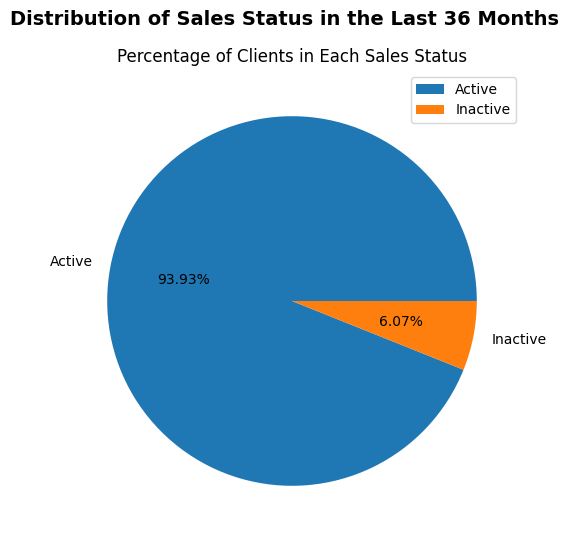

In [ ]:
# Step 5: Create pie chart
plt.subplots(figsize=(6,6))

plt.pie(sales_status_L36M['number_of_users'], #value to be plotted
        labels= sales_status_L36M['sales_status_L36M'], #labelin
        autopct='%.2f%%' #for annotate (show) percentage (rounded up tp 2 ) in each pie category
        ); #tanda ";" di akhir function untuk show plot

# Adding legend
plt.legend()

# Adding title
plt.suptitle('Distribution of Sales Status in the Last 36 Months', fontweight='bold', fontsize=14)
plt.title('Percentage of Clients in Each Sales Status', fontsize=12)

plt.show()

* There are **750 clients** with **inactive sales**, meaning these clients haven't made any purchases in the last 36 months. This represents **6.07%** of the total client base.

* There are **11,605 clients** with **active sales**, meaning these clients have made purchases in the last 36 months. This represents ** 93.93%** of the total client base.

* Overall, the number of inactive clients is relatively **low**, representing only about **6.07% of the total number of clients base.** and the active client group is **15 times larger** than the inactive client group.

* The fact that the active client group is significantly larger than the inactive client group suggests that RevoBank has a **relatively high client retention rate**. This is a positive indicator for the bank's overall performance.

* We can **prioritize strategies** to maintain engagement and increase purchase frequency among **active clients** and implement programs with incentives to re-engage inactive clients.

# 3. Calcute Account Activity Level

In the data dictionary, the account activity level "X" is said to be the most active transacting compared to other levels. Is it true? Present your findings in a data visualization. (Hint: Group by account activity level and calculate median months since the last transaction from each level. Additionally, calculate the average number of transactions in the past 3 years for each level. Use a bar chart to present the result.)

group by account

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M  
0            Active  
1            Active  
2            Active  
3            Active  
4            Active

In [ ]:
# Step 1: Checking Group by account activity level and calculate median and average transaction counts over the past three years for each level
df.groupby(['account_activity_level']).agg({
    'month_since_last_sales': 'median',
    'cnt_sales_L36M': 'mean'
})

month_since_last_sales  cnt_sales_L36M
account_activity_level                                        
X                                         18.0        3.284302
Y                                         18.0        2.339471
Z                                         19.0        1.228504

In [ ]:
# Step 1: Group by account activity level and calculate median and average transaction counts over the past three years for each level
activity_level_summary = df.groupby(['account_activity_level']).agg({
    'month_since_last_sales': 'median',
    'cnt_sales_L36M': 'mean'
}).rename(columns={
    'month_since_last_sales': 'median_month_since_last_sales',
    'cnt_sales_L36M': 'avg_cnt_sales_L36M'
})
activity_level_summary


median_month_since_last_sales  avg_cnt_sales_L36M
account_activity_level                                                   
X                                                18.0            3.284302
Y                                                18.0            2.339471
Z                                                19.0            1.228504

Next, we visualize Median of Month Since Last Sales per Account Activity Level using bar chart

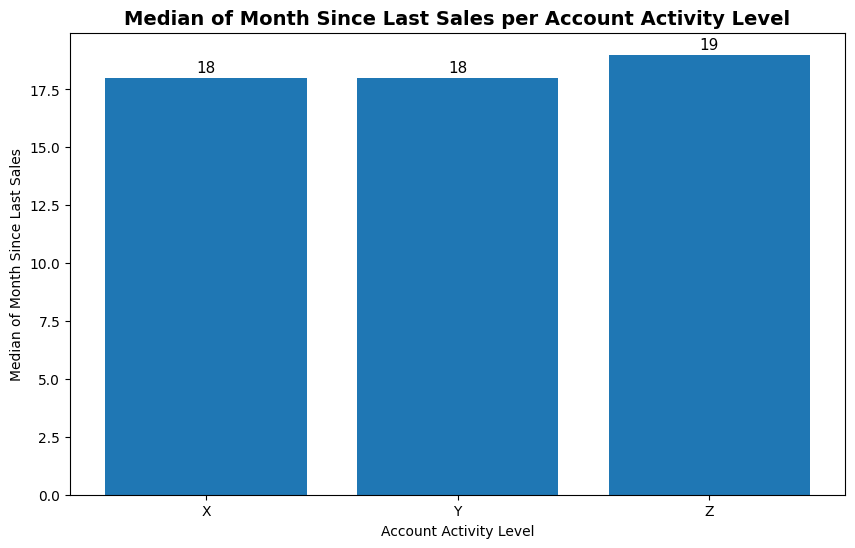

In [ ]:
# Step 2a: create bar chart for median

# Set chart size
plt.subplots(figsize=(10,6))

# Access the index instead of column for 'account_activity_level'
value = plt.bar(activity_level_summary.index, activity_level_summary['median_month_since_last_sales'])

# Adding x-label and y-label
plt.xlabel('Account Activity Level', fontsize=10)
plt.ylabel('Median of Month Since Last Sales', fontsize=10)

# Adding title
plt.title('Median of Month Since Last Sales per Account Activity Level', fontweight='bold', fontsize=14)

# Adding label. Padding = 2, artinya memberi jarak dari angka ke bar-nya. Makin besar angkanya, makin jauh posisi angka dr bar
plt.bar_label(value, padding=2, fontsize=11);

* The median months since last purchase across all activity groups—X (**18**), Y (**18**), and Z (**19**)—are nearly identical, indicating that at least **50% ** of accounts in each group haven’t made a purchase in over **1.5 years**
* Despite **Group X **being labeled as the "**most active**", its recency of purchase is not **significantly better** than Groups Y or Z. The difference in **median values is minimal**, suggesting **similar levels of inactivity across all groups**.
* The current account activity **labeling system may not reflect actual engagement**. RevoBank should consider redefining activity tiers using data-driven behavioral metrics (e.g., purchase recency and frequency) to enable more accurate targeting and personalized engagement strategies.

Next, we visualize Average number of transactions in the last 36 months per Account Activity Level using bar chart

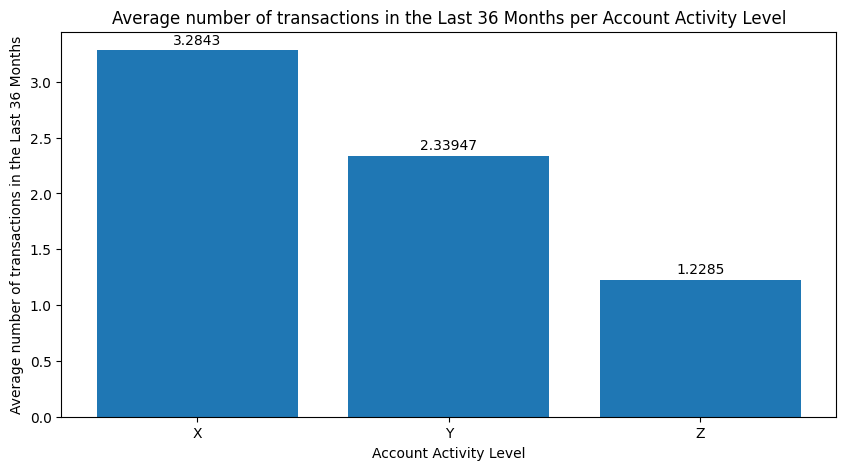

In [ ]:
# Step 2b: create bar chart for average

# Set chart size
plt.subplots(figsize=(10,5))

# Access the index instead of column for 'account_activity_level'
value = plt.bar(activity_level_summary.index, activity_level_summary['avg_cnt_sales_L36M'])

# Adding x-label and y-label
plt.xlabel('Account Activity Level')
plt.ylabel('Average number of transactions in the Last 36 Months')

# Adding title
plt.title('Average number of transactions in the Last 36 Months per Account Activity Level')

# Adding label. Padding = 2, artinya memberi jarak dari angka ke bar-nya. Makin besar angkanya, makin jauh posisi angka dr bar
plt.bar_label(value, padding=2);

The bar chart illustrates the average number of transactions in the last 36 months for each account activity level (X, Y, Z):

* Level X accounts had the **highest** average number of transactions at 3.28,
* Level Y followed with an average of 2.34,
* Level Z had the lowest average with only 1.23 transactions.

This trend indicates that accounts in Level X are more active in terms of purchasing frequency, whereas those in Level Z are relatively inactive.

Since transaction counts are typically whole numbers (integer values), the average values shown here are rounded to zero decimal places in reporting to enhance clarity for a broader audience.

Rounded averages:

* Level X ≈ 3 transactions
* Level Y ≈ 2 transactions
* Level Z ≈ 1 transaction

round the average values

In [ ]:
activity_level_summary

median_month_since_last_sales  avg_cnt_sales_L36M
account_activity_level                                                   
X                                                18.0            3.284302
Y                                                18.0            2.339471
Z                                                19.0            1.228504

In [ ]:
# Step 3: round avg_cnt_sales_L36M
activity_level_summary['avg_cnt_sales_L36M'] = activity_level_summary['avg_cnt_sales_L36M'].round(0)
activity_level_summary

median_month_since_last_sales  avg_cnt_sales_L36M
account_activity_level                                                   
X                                                18.0                 3.0
Y                                                18.0                 2.0
Z                                                19.0                 1.0

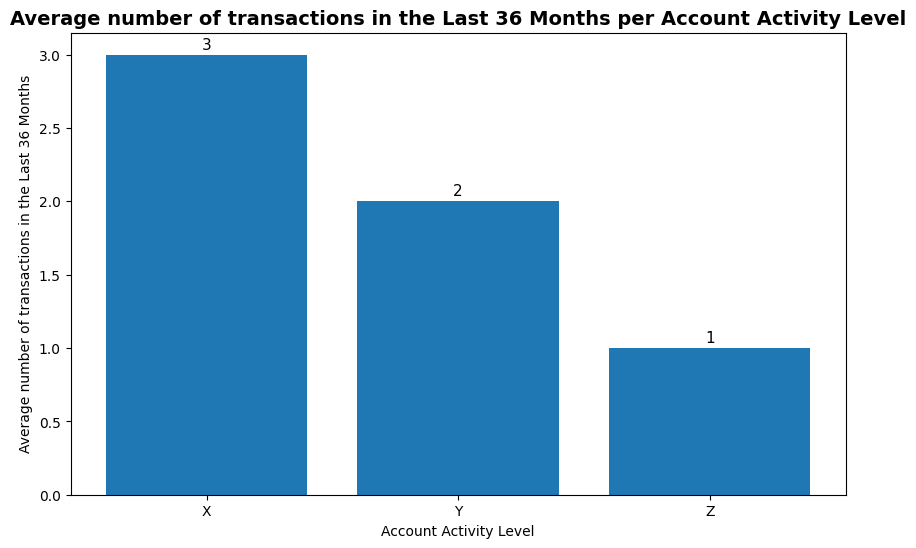

In [ ]:
# Step 4: create bar chart for average

# Set chart size
plt.subplots(figsize=(10,6))

# Access the index instead of column for 'account_activity_level'
value = plt.bar(activity_level_summary.index, activity_level_summary['avg_cnt_sales_L36M'])

# Adding x-label and y-label
plt.xlabel('Account Activity Level')
plt.ylabel('Average number of transactions in the Last 36 Months')

# Adding title
plt.title('Average number of transactions in the Last 36 Months per Account Activity Level', fontweight='bold', fontsize=14)

# Adding label. Padding = 2, artinya memberi jarak dari angka ke bar-nya. Makin besar angkanya, makin jauh posisi angka dr bar
plt.bar_label(value, padding=2, fontsize=11);

* The chart displays a **decreasing trend** in the average number of transactions from Level X to Level Z.

* Accounts categorized as Level X, with an average of **3** transactions over the past 36 months, can be classified as the most active transaction level.

* Level Y accounts, exhibiting an average of **2** transactions within the same period, can be classified as the moderately active transaction level.

* Level Z accounts, having recorded an average of only **1** transaction during that timeframe, can be classified as the least active transaction level.

* Although the median recency of transactions is similar across all account levels (around 18–19 months), Level X shows a noticeably higher average transaction count over the past 36 months, indicating more frequent engagement. However, evaluating the accuracy of activity level classifications shouldn’t rely solely on central tendency metrics like median or mean. To ensure more robust segmentation, additional behavioral indicators—such as value per transaction—should be considered.
* We should reassess the account activity classification using more than just averages or medians to better capture client behavior and ensure the segments reflect true engagement.


# 4. Profit Analysis Based on Gender

Is it true that male clients generate higher profits compared to female clients? (Hint: Group by female flag and use aggregate statistics to check the difference of profitability between male and female clients. Hence, you need to calculate the profit first. Also, the "profit" referred here is the profit per client, not the total profit. Use boxplots to present your result)

**NOTES**: Banks earn profit from sales. For RevoBank, let's assume that for every 100 euros of sales, the bank generates 2.4 euros of profit. This means that the bank earns a profit margin of** 2.4% from the total sales amount.**


hypotheses: male clients generate more profit compare to f

calculate profit first

group by female flag
use agregate to cek profitability on each client

In [ ]:
#backuping data again
backup6 = df.copy()

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M  
0            Active  
1            Active  
2            Active  
3            Active  
4            Active

In [ ]:
# Step 1 : Calculate profit
df['profit']=df['total_sales_L36M']* 0.024

<ipython-input-76-bad49c9def5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit']=df['total_sales_L36M']* 0.024


In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  
0            Active   600.00  
1            Active  1080.00  
2            Active  2495.52  
3            Active  3719.52  
4            Active  1800.00

We have augmented our dataframe by adding a profit column, calculated by multiplying the sales_status_L36M column by 2.4%, reflecting the bank's 2.4% profit margin on total sales. We will now group the data by the flag_female column and utilize aggregate statistics to examine the profitability difference between male and female clients.

In [ ]:
# Step 2: Group by flag_female and aggregate using various statistics
profit_by_gender_2 = df.groupby(['flag_female']).agg({
    'flag_female' : 'count',
    'profit' : ['sum','mean', 'min', 'median', 'max']
}).reset_index()
profit_by_gender_2

flag_female            profit                                 
              count         sum        mean  min  median     max
0           0  5678  4474527.84  788.046467  0.0  660.00  5400.0
1           1  6677  5187164.64  776.870547  0.0  695.52  5865.6

- **Client count**: Female = 6,677 | Male = 5,678  
- **Total profit**: Female clients = 5,187,164.64 euros | Male clients = 4,474,527.84 euros  
- **Average profit per client**: Male = 788.05 euros | Female = 776.87 euros  
- **Median profit**: Female = 695.52 euros | Male = 660.00 euros  
- **Maximum profit**: Female = 5,865.60 euros | Male = 5,400.00 euros  
- **Minimum profit**: 0 euros for both groups
- Despite male clients having a higher average profit (11.18 euros more than female clients), the median profit is higher among females, indicating that **female profitability is more consistent across the segment**.
- The small average gap suggests that **male client averages may be skewed by outliers**, as their profit distribution is likely less centered.
- Female clients not only outnumber males but also **deliver higher total profit and more centralized profit distribution** (evident from median and max values).
- **Strengthen retention and engagement strategies for female clients**, who show reliable profitability and represent a strong revenue base.
- For male clients, **analyze distribution further to isolate high-value outliers**, and **create targeted programs** to encourage broader spending and boost overall performance.


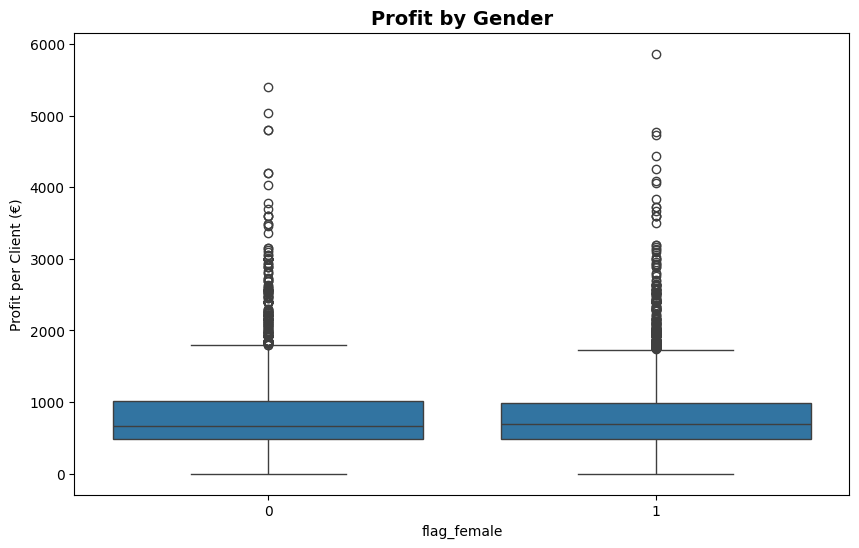

In [ ]:
# Step 3: create boxplot

# Set chart size
plt.figure(figsize=(10, 6))
# Create boxplot using seaborns
sns.boxplot(x='flag_female', y='profit', data=df)
# Adding title
plt.title('Profit by Gender',fontweight='bold', fontsize=14)
# Adding label
plt.ylabel('Profit per Client (€)')
plt.show()


   - Both male (flag_female = 0) and female (flag_female = 1) clients have a wide range of profits, from **0 to nearly 5,865.60 euros**.
   - **Male clients** show a **higher average profit (788.05 euros)** than females (**776.87 euros**), but the difference is small (**11.18 euros**).
   - **Female clients have a higher median profit (695.52 euros)** compared to males (**660.00 euros**), indicating more consistent profitability among the majority of female clients.
   - The **boxplot for males shows a wider spread** and more extreme outliers, suggesting greater variation in profit among male clients.
   - Despite the presence of high-profit outliers in both groups, the **distribution for females is more centered around higher values**, as reflected in the slightly elevated box in the plot.
   - The **higher average profit among males is influenced by a few extreme outliers**, rather than consistent performance across the group.
   - **Female clients show stronger consistency in generating profit**, supported by higher median and tighter distribution in the boxplot.
   - This suggests that female clients may offer **more predictable and stable value**, even if their average profit appears slightly lower.
   - Avoid relying solely on average metrics when assessing client profitability, as **outliers can distort interpretations**.
   - Incorporate **both average and median values**, and analyze **distribution patterns** to form a well-rounded view of client performance.
   - **Target high-performing male outliers** for deeper analysis and potential replication, while also **leveraging the stable profit behavior of female clients** for long-term strategic campaigns.

# 5. Porpotion of Total Sales in the Past 3 Years

  Calculate the proportion of total sales in the past 3 years based on generations (Boomer, Gen-X Millenial, Gen-Z, Gen-Alpha). Does the total sales skew toward a certain demographic group? If so, what is your recommendation for the bank to improve sales performance? Present your findings in a data visualization. (Hint: Use.dt.year to extract the year of birth from the birth date, then use pd.cut to categorize the year into generations. In presenting the result, you can also add the breakdown of the total sales: avg sales amount, and count of sales)

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  
0            Active   600.00  
1            Active  1080.00  
2            Active  2495.52  
3            Active  3719.52  
4            Active  1800.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

In [ ]:
# Step 1: Extract the year of birth
df['birth_year'] = df['birth_date'].dt.year

<ipython-input-82-b14fec121f36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = df['birth_date'].dt.year


In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  birth_year  
0            Active   600.00        1996  
1            Active  1080.00        1971  
2            Active  2495.52        1953  
3            Active  3719.52        1997  
4            Active  1800.00        1989

In [ ]:
df['birth_year'].describe()

count    12355.000000
mean      1965.465075
std         13.952426
min       1946.000000
25%       1953.000000
50%       1963.000000
75%       1976.000000
max       2002.000000
Name: birth_year, dtype: float64


| Generation | Year of Birth     |
|------------|-------------------|
| Boomer     | 1946 – 1964       |
| Gen-X      | 1965 – 1980       |
| Millennial | 1981 – 1996       |
| Gen-Z      | 1997 – 2012       |
| Gen-Alpha  | 2013 – 2030    |

In [ ]:
# Step 2: Categorize clients into generations

pd. cut(
    df['birth_year'], # kolom yang mau di-binning/dikelompokkan
    [1946,1964, 1980, 1996, 2012], # batas binning-nya
#generation_labels = ['Boomer', 'Gen-X', 'Millennial', 'Gen-Z']# nama untuk setiap bin
    include_lowest=True,
)

0          (1980.0, 1996.0]
1          (1964.0, 1980.0]
2        (1945.999, 1964.0]
3          (1996.0, 2012.0]
4          (1980.0, 1996.0]
                ...        
12554      (1964.0, 1980.0]
12555    (1945.999, 1964.0]
12556      (1980.0, 1996.0]
12557      (1964.0, 1980.0]
12558      (1964.0, 1980.0]
Name: birth_year, Length: 12355, dtype: category
Categories (4, interval[float64, right]): [(1945.999, 1964.0] < (1964.0, 1980.0] < (1980.0, 1996.0] <
                                           (1996.0, 2012.0]]

In [ ]:
# Step 2: Adding to column the categorize clients into generations: Boomer: 1946 - 1964, Gen-X = 1965 - 1980, Millennial = 1981 - 1996, Gen-Z = 1997 -2012

df['generation'] = pd. cut(
    df['birth_year'], # kolom yang mau di-binning/dikelompokkan
    [1946, 1964, 1980, 1996, 2012], # batas binning-nya
    labels = ['Boomer', 'Gen-X', 'Millennial', 'Gen-Z'], # nama untuk setiap bin
    include_lowest=True,
)

<ipython-input-86-3aff37ba7c6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation'] = pd. cut(


In [ ]:
# Checking the binning, is it true 1997 is Gen-Z?
df[df['birth_year'] == 1997].head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
3    100000612                      X                    A   84            1   
82   100007735                      X                    B   66            0   
192  100017682                      X                    B   28            0   
622  100050316                      Z                    C   17            0   
727  100058246                      X                    B   56            0   

     avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
3           25830.0               6     25000.0                      14   
82          25000.0               3     25000.0                      27   
192         15000.0               2     15000.0                      17   
622         20000.0               1     20000.0                      17   
727         17250.0               4     20000.0                      18   

     count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
3                          7 1997-06-07          25          154980.0   
82                         6 1997-06-21          25           75000.0   
192                        4 1997-11-13          25           30000.0   
622                        5 1997-02-21          26           20000.0   
727                        6 1997-10-16          25           69000.0   

    sales_status_L36M   profit  birth_year generation  
3              Active  3719.52        1997      Gen-Z  
82             Active  1800.00        1997      Gen-Z  
192            Active   720.00        1997      Gen-Z  
622            Active   480.00        1997      Gen-Z  
727            Active  1656.00        1997      Gen-Z

We have created 4 bins for age groups with the following divisions:
* Boomer: 1946 – 1964
* Gen-X: 	1965 – 1980
* Millennial:	1981 – 1996
* Gen-Z:	1997 – 2012

In [ ]:
# Step 3: Group by generation and calculate number_of_clients, number_of_sales,avg_number_of_sales,total_sales,avg_sales
df.groupby('generation').agg(
    number_of_clients =('account_id', 'nunique'),
    number_of_sales = ('cnt_sales_L36M', 'sum'),
    avg_number_of_sales=('cnt_sales_L36M', 'mean'),
    total_sales=('total_sales_L36M', 'sum'),
    avg_sales=('total_sales_L36M', 'mean'),
).reset_index()

<ipython-input-88-65cbed95ef1d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('generation').agg(


generation  number_of_clients  number_of_sales  avg_number_of_sales  \
0      Boomer               6498            18519             2.849954   
1       Gen-X               3603             8908             2.472384   
2  Millennial               2103             4933             2.345697   
3       Gen-Z                151              415             2.748344   

   total_sales     avg_sales  
0  214504820.0  33010.898738  
1  118989560.0  33025.134610  
2   64030320.0  30447.132668  
3    5045820.0  33416.026490

In [ ]:
# Step 3: Group by generation and calculate number_of_clients, number_of_sales,avg_number_of_sales,total_sales,avg_sales
sales_by_generation = df.groupby('generation').agg(
    number_of_clients =('account_id', 'nunique'),
    number_of_sales = ('cnt_sales_L36M', 'sum'),
    avg_number_of_sales=('cnt_sales_L36M', 'mean'),
    total_sales=('total_sales_L36M', 'sum'),
    avg_sales=('total_sales_L36M', 'mean'),
).reset_index()

sales_by_generation

<ipython-input-89-ba5072c15ec3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_generation = df.groupby('generation').agg(


generation  number_of_clients  number_of_sales  avg_number_of_sales  \
0      Boomer               6498            18519             2.849954   
1       Gen-X               3603             8908             2.472384   
2  Millennial               2103             4933             2.345697   
3       Gen-Z                151              415             2.748344   

   total_sales     avg_sales  
0  214504820.0  33010.898738  
1  118989560.0  33025.134610  
2   64030320.0  30447.132668  
3    5045820.0  33416.026490

after we make some calculation, we want to calculate sales proportion by diving total sales per each generation with total sales all generation

In [ ]:
# Step 4: Calculate sales proportion, adding on our sales_by_generation df
sales_by_generation['proportion_sales'] = sales_by_generation['total_sales'] / sales_by_generation['total_sales'].sum()

sales_by_generation

generation  number_of_clients  number_of_sales  avg_number_of_sales  \
0      Boomer               6498            18519             2.849954   
1       Gen-X               3603             8908             2.472384   
2  Millennial               2103             4933             2.345697   
3       Gen-Z                151              415             2.748344   

   total_sales     avg_sales  proportion_sales  
0  214504820.0  33010.898738          0.532838  
1  118989560.0  33025.134610          0.295574  
2   64030320.0  30447.132668          0.159054  
3    5045820.0  33416.026490          0.012534

- **Boomers** dominate with **6,498 clients** and **18,519 sales**, generating the highest **total sales** of **21,450,482 euros** (53.28% of total), with an **average of 33,010 euros per client**.
- **Gen-X** follows with **3,603 clients**, **8,908 sales**, and **11,898,956 euros total sales** (29.56%), with an **average of 33,025 euros per client**.
- **Millennials** contribute **6.4 million euros** (15.91%), with **2,103 clients** and **average sales per client** of **30,447 euros**.
- **Gen-Z** is the smallest group with only **151 clients** (1.25% total sales), but has the **highest average sales per client** (33,416 euros) — possibly due to **high-value outliers**.
- **Boomers are the backbone of revenue**, generating **over half of total sales (53.28%)** with strong transaction volume and average spending.  
- Meanwhile, **Gen-Z, though smallest in size**, shows **unexpectedly high average sales**,This unusually high average suggests that a f**ew Gen-Z accounts may have made large transactions**, pushing the overall average up — a sign of possible outliers or premium customer behavior.
- **Prioritize Boomers** with loyalty and retention strategies — they are your **core profit base**.
- Since **Gen-X** still holds a **sizable portion** of total clients and revenue, targeted retention strategies can help maximize lifetime value and prevent churn from this reliable customer base.
- **Explore Gen-Z behavior deeper** — validate whether high averages reflect real premium potential or are driven by a few large purchases.
- **Re-engage Millennials** with tailored offerings — they show mid-level engagement but hold significant future value if nurtured right.

<ipython-input-91-7c64b4e5cf59>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_generation, x='generation', y='proportion_sales', palette=colors)


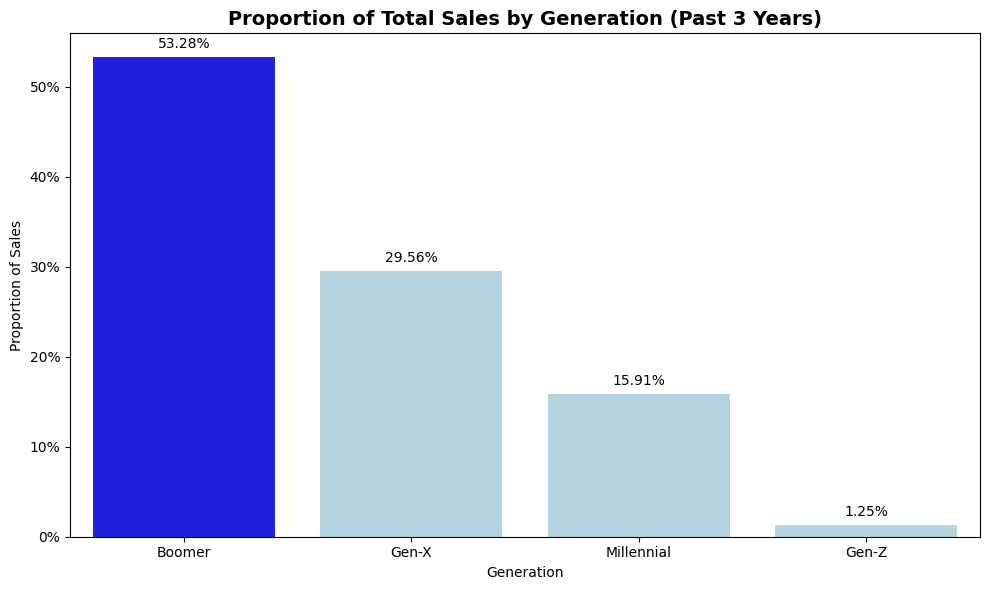

In [ ]:
# Step 5: Create bar chart
# Ensure correct order
gen_order = ['Boomer', 'Gen-X', 'Millennial', 'Gen-Z']
sales_by_generation['generation'] = pd.Categorical(sales_by_generation['generation'], categories=gen_order, ordered=True)

# Set bar colors (highlight max)
colors = ['blue' if x == sales_by_generation['proportion_sales'].max() else 'lightblue' for x in sales_by_generation['proportion_sales']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_generation, x='generation', y='proportion_sales', palette=colors)

# Add % labels
for i, val in enumerate(sales_by_generation['proportion_sales']):
    plt.text(i, val + 0.01, f'{val*100:.2f}%', ha='center', fontsize=10)

plt.title('Proportion of Total Sales by Generation (Past 3 Years)', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Sales')
plt.xlabel('Generation')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.tight_layout()
plt.show()

* Sales contribution **trends downward** across generations, from Boomers to Gen-Z.
- **Boomers** lead with **53.28% of total sales** from **6,498 clients**, averaging **33,011 euros per client**.  
- **Gen-X** contributes **29.56%**, with **3,603 clients** and the **highest average sales per client at 33,025 euros**.  
- **Millennials** generate **15.91% of sales** across **2,103 clients**, averaging **30,447 euros per client**.  
- **Gen-Z** holds only **1.25% of total sales**, but with the **highest average per client at 33,416 euros**—likely skewed by a few **high-value outliers**.
- **Boomers and Gen-X are the bank’s strongest revenue drivers** with large client bases and high average sales.  
- **Millennials underperform** in both volume and value.  
- **Gen-Z's contribution** is **quite small** but **their high average sales per client**. This could indicate a few high-value accounts acting as outliers, but also signals future potential  sales growth as they mature into greater purchasing power.
- To improve overall sales performance and customer engagement across generations, RevoBank should implement loyalty programs or exclusive offers for Boomers and Gen-X to retain their engagement and revenue. The bank should also analyze Gen-Z high-spender profiles to identify niche markets and tailor premium offerings to capture future high-value clients and Millennial engagement should be boosted through relevant, value-driven campaigns that align with their current behavior and preferences.


# 6.  Relationship Analysis between Increasing The Number of email and SMS Messages improved total sales performance

  Is there a relationship between increasing the number of email and SMS messages and improved total sales performance? If so, what is your recommendation for the bank to improve its sales performance? Present your findings in a line chart. (Hint: Group the specific data by promo communication count and calculate the total sales per customer in each group. "Specific data" is mentioned because you might select any specific pattern based on any column.)

In [ ]:
df.head( )

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  birth_year  generation  
0            Active   600.00        1996  Millennial  
1            Active  1080.00        1971       Gen-X  
2            Active  2495.52        1953      Boomer  
3            Active  3719.52        1997       Gen-Z  
4            Active  1800.00        1989  Millennial

In [ ]:
#backuping data again
backup7 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

    total_sales_L36M captures the total sales over the past 36 months, while
    count_direct_promo_L12M captures the number of direct promotional messages (email/SMS) sent in the last 12 months.
* These two time frames don’t fully align, which presents a challenge when trying to directly correlate promotional activity with total sales.

* However, by filtering the data using month_since_last_sales <= 12, we ensure that we only consider customers who made purchases in the last 12 months — the same time window during which promotions were sent.

In [ ]:
# Step 1: Filter customers who made a purchase in the last 12 months, so their last purchase happened within the last 12 months
df_active = df[df['month_since_last_sales'] <= 12]
df_active

account_id account_activity_level customer_value_level  MOB  \
14     100001673                      X                    A   41   
15     100001700                      X                    A  127   
25     100002499                      X                    A  124   
35     100003560                      X                    A  127   
107    100010121                      Z                    A   91   
...          ...                    ...                  ...  ...   
12021  101015104                      X                    E   89   
12088  101019744                      Y                    C  128   
12282  101037008                      X                    C  106   
12283  101037146                      Z                    C   17   
12466  101051886                      X                    E  123   

       flag_female  avg_sales_L36M  cnt_sales_L36M  last_sales  \
14               1          9000.0               5     10000.0   
15               0         26250.0               4     25000.0   
25               1         25000.0               2     25000.0   
35               1         17500.0               2     20000.0   
107              1          5000.0               9      5000.0   
...            ...             ...             ...         ...   
12021            1          9250.0               5     10000.0   
12088            1          4500.0              12      5000.0   
12282            0         10000.0               2     10000.0   
12283            1         15000.0               1     15000.0   
12466            0         10500.0               4     10000.0   

       month_since_last_sales  count_direct_promo_L12M birth_date  client_age  \
14                          7                        8 1948-09-10          74   
15                          4                        7 1952-03-18          71   
25                          6                        8 1984-10-17          38   
35                          5                        7 1949-03-08          74   
107                        11                        8 1973-04-24          50   
...                       ...                      ...        ...         ...   
12021                       8                        9 1986-07-17          36   
12088                       7                       10 1986-08-03          36   
12282                       9                        6 1964-06-20          58   
12283                       7                        6 1954-01-25          69   
12466                      10                        6 1956-08-26          66   

       total_sales_L36M sales_status_L36M  profit  birth_year  generation  
14              45000.0            Active  1080.0        1948      Boomer  
15             105000.0            Active  2520.0        1952      Boomer  
25              50000.0            Active  1200.0        1984  Millennial  
35              35000.0            Active   840.0        1949      Boomer  
107             45000.0            Active  1080.0        1973       Gen-X  
...                 ...               ...     ...         ...         ...  
12021           46250.0            Active  1110.0        1986  Millennial  
12088           54000.0            Active  1296.0        1986  Millennial  
12282           20000.0            Active   480.0        1964      Boomer  
12283           15000.0            Active   360.0        1954      Boomer  
12466           42000.0            Active  1008.0        1956      Boomer  

[288 rows x 17 columns]

In [ ]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 14 to 12466
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               288 non-null    object        
 1   account_activity_level   288 non-null    object        
 2   customer_value_level     288 non-null    object        
 3   MOB                      288 non-null    int64         
 4   flag_female              288 non-null    int64         
 5   avg_sales_L36M           288 non-null    float64       
 6   cnt_sales_L36M           288 non-null    int64         
 7   last_sales               288 non-null    float64       
 8   month_since_last_sales   288 non-null    int64         
 9   count_direct_promo_L12M  288 non-null    int64         
 10  birth_date               288 non-null    datetime64[ns]
 11  client_age               288 non-null    int64         
 12  total_sales_L36M         288 non-null 

In [ ]:
df_active.describe()

MOB  flag_female  avg_sales_L36M  cnt_sales_L36M    last_sales  \
count  288.000000   288.000000      288.000000      288.000000    288.000000   
mean    88.402778     0.489583    12322.013889        3.819444  12682.291667   
min     16.000000     0.000000        0.000000        1.000000      0.000000   
25%     56.750000     0.000000     9000.000000        2.000000  10000.000000   
50%     91.000000     0.000000    10000.000000        3.000000  10000.000000   
75%    122.250000     1.000000    16407.500000        5.000000  20000.000000   
max    571.000000     1.000000    37500.000000       12.000000  40000.000000   
std     46.985107     0.500762     6405.366879        2.428497   6719.667863   

       month_since_last_sales  count_direct_promo_L12M           birth_date  \
count              288.000000               288.000000                  288   
mean                 6.604167                 7.173611  1959-06-03 02:45:00   
min                  3.000000                 2.000000  1946-01-04 00:00:00   
25%                  5.000000                 6.000000  1951-04-07 18:00:00   
50%                  6.000000                 7.000000  1955-03-08 12:00:00   
75%                  8.000000                 8.000000  1964-04-03 00:00:00   
max                 12.000000                16.000000  1998-02-26 00:00:00   
std                  2.305028                 2.062879                  NaN   

       client_age  total_sales_L36M       profit   birth_year  
count  288.000000        288.000000   288.000000   288.000000  
mean    63.572917      39810.451389   955.450833  1958.954861  
min     25.000000          0.000000     0.000000  1946.000000  
25%     59.000000      25000.000000   600.000000  1951.000000  
50%     68.000000      35000.000000   840.000000  1955.000000  
75%     72.000000      50000.000000  1200.000000  1964.000000  
max     77.000000     198960.000000  4775.040000  1998.000000  
std     12.077922      23432.929884   562.390317    12.048452

In [ ]:
# Step 2a: group by based on  count_direct_promo_L12M from df_active and aggregate sum total_sales_L36M

sales_by_promo_L12M = df_active.groupby('count_direct_promo_L12M')['total_sales_L36M'].sum().reset_index()
sales_by_promo_L12M

count_direct_promo_L12M  total_sales_L36M
0                         2           32000.0
1                         3           64990.0
2                         4          408390.0
3                         5          981880.0
4                         6         1558360.0
5                         7         2988900.0
6                         8         2556470.0
7                         9         1169390.0
8                        10          391540.0
9                        11          719200.0
10                       12          218440.0
11                       13          142800.0
12                       14          128000.0
13                       16          105050.0

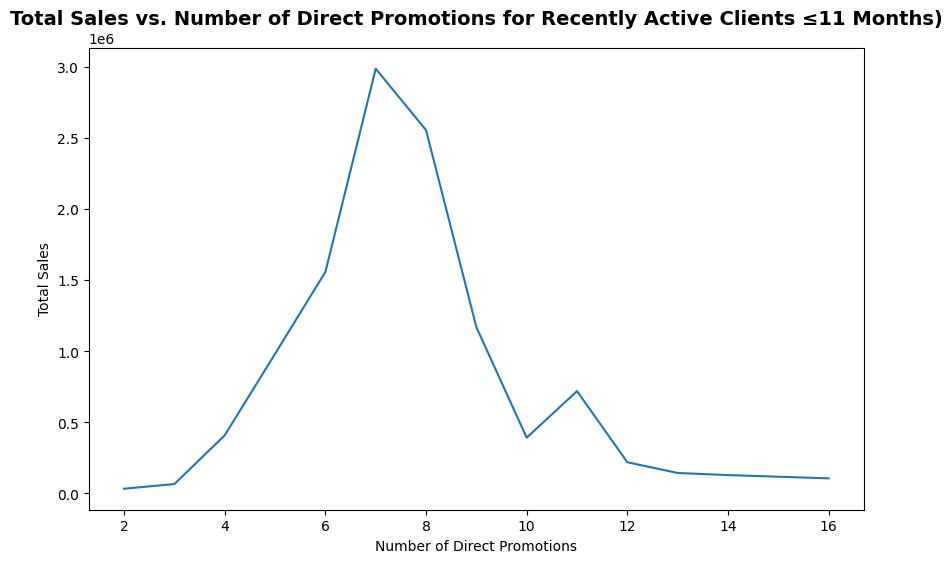

In [ ]:
# Step 3a: Creat line chart

# Set chart size
plt.figure(figsize=(10, 6))
#Crteate line char
sns.lineplot(data=sales_by_promo_L12M, x='count_direct_promo_L12M', y='total_sales_L36M')
# Adding title
plt.title('Total Sales vs. Number of Direct Promotions for Recently Active Clients ≤11 Months)', fontsize=14, fontweight='bold')
#Adding label
plt.xlabel('Number of Direct Promotions')
plt.ylabel('Total Sales')

plt.show()


* There is a **positive correlation** between increased promotional communications and higher total sales, particularly **in the initial stages (e.g., 0-7 promotions).**
* After reaching a peak (**around 7 promotions**), further promotions might not **substantially increase sales and could even lead to declines.**
* This suggests that t**he optimal number of promotions is between 4 and 7**, as indicated by the positive spike on the chart. **Providing more than 7 promotions** shows a specific downward trend, potentially **suggesting that clients are overwhelmed by excessive promotional messages**.
*  We can continuously assess how customers respond to promotions to avoid overwhelming them, which can lead to fatigue or reduced engagement.

The trend above is clear but still confusing because the number_of_direct_promotion varies. To make it easier to detect the relationship between increasing the number of email and SMS messages and improved total sales performance, we will perform binning on the number_of_direct_promotion.


| **Promo Category** | **Direct Promo Count** | **Definition / Business Meaning**                                                                 |
|--------------------|------------------------|----------------------------------------------------------------------------------------------------|
| 🟦 **Low**          | 2–5                    | Customers who have received limited direct promotions. May lack awareness or engagement stimuli.   |
| 🟨 **Moderate**     | 6–9                    | Customers with a balanced level of promo exposure. Likely aware and receptive to communication.    |
| 🟧 **High**         | 10–13                  | Customers who are frequently contacted. Indicate higher engagement or loyalty potential.           |
| 🟥 **Saturated**    | ≥14                    | Customers with very high promo exposure. Risk of fatigue or reduced responsiveness to messaging.   |

In [ ]:
# Step 2b: Binning 'count_direct_promo_L12M'
# Define min and max
min_promo = df_active['count_direct_promo_L12M'].min()
max_promo = df_active['count_direct_promo_L12M'].max()

# Binning 'count_direct_promo_L12M'
# with the category: low =2-5, moderate= 6-9, high= 10-13, saturated = >=14
pd.cut(
    df_active['count_direct_promo_L12M'], # kolom yang mau di-binning/dikelompokkan
    [min_promo,5,9,13, max_promo], # batas binning-nya
    include_lowest=True,
    labels = ['low', 'moderate', 'high', 'saturated'] #generate labels
)

14       moderate
15       moderate
25       moderate
35       moderate
107      moderate
           ...   
12021    moderate
12088        high
12282    moderate
12283    moderate
12466    moderate
Name: count_direct_promo_L12M, Length: 288, dtype: category
Categories (4, object): ['low' < 'moderate' < 'high' < 'saturated']

In [ ]:
# Step 2b: Binning 'count_direct_promo_L12M'
# Define min and max
min_promo = df_active['count_direct_promo_L12M'].min()
max_promo = df_active['count_direct_promo_L12M'].max()

# Binning 'count_direct_promo_L12M'
# with the category: low =2-5, moderate= 6-9, high= 10-13, saturated = >=14
df_active ['active_promotion_group'] = pd.cut(
    df_active['count_direct_promo_L12M'], # kolom yang mau di-binning/dikelompokkan
    [min_promo,5,9,13, max_promo], # batas binning-nya
    include_lowest=True,
    labels = ['low', 'moderate', 'high', 'saturated'] #generate labels
)

<ipython-input-101-aebca92754e9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active ['active_promotion_group'] = pd.cut(


In [ ]:
# Rename labels menjadi rename('active_promotion_group')= ['low (2-5)', 'moderate (6-9)', 'high (10-13)', 'saturated (>14)']

df_active['active_promotion_group'] = df_active['active_promotion_group'].cat.rename_categories({'low': 'low (2-5)', 'moderate': 'moderate (6-9)', 'high': 'high (10-13)', 'saturated': 'saturated (>14)'})

<ipython-input-102-ad02177775ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['active_promotion_group'] = df_active['active_promotion_group'].cat.rename_categories({'low': 'low (2-5)', 'moderate': 'moderate (6-9)', 'high': 'high (10-13)', 'saturated': 'saturated (>14)'})


In [ ]:
# Step 3b : group by based on active_promotion_group and aggregate using sum on total_sales_L36M
sales_by_promo_L12M_2 = df_active.groupby('active_promotion_group')['total_sales_L36M'].sum().reset_index()
sales_by_promo_L12M_2

<ipython-input-103-f536c6f7b5e5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_promo_L12M_2 = df_active.groupby('active_promotion_group')['total_sales_L36M'].sum().reset_index()


active_promotion_group  total_sales_L36M
0              low (2-5)         1487260.0
1         moderate (6-9)         8273120.0
2           high (10-13)         1471980.0
3        saturated (>14)          233050.0

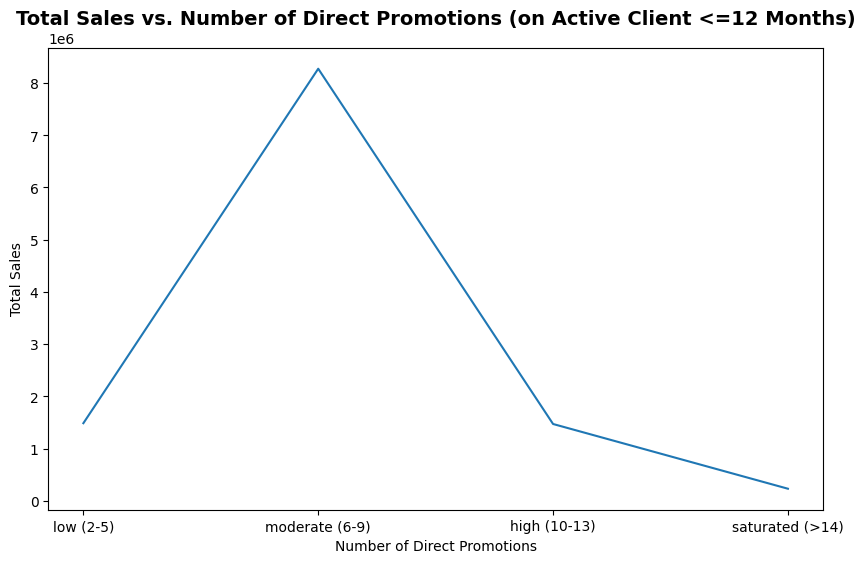

In [ ]:
# Step 4b: create line chart

# Set chart size
plt.figure(figsize=(10, 6))
# Create line chart
sns.lineplot(data=sales_by_promo_L12M_2, x='active_promotion_group', y='total_sales_L36M')
# Adding title
plt.title('Total Sales vs. Number of Direct Promotions (on Active Client <=12 Months)', fontsize=14, fontweight='bold')
# Adding label
plt.xlabel('Number of Direct Promotions')
plt.ylabel('Total Sales')

plt.show()


* The **moderate promotion group (6–9 times per year)** contributes the **highest total sales**, amounting to **8,273,120 euros**, suggesting this is the **optimal annual frequency** for promotional effectiveness.
* However, when the number of promotions **exceeds 9 per year**, total sales show a **clear downward trend** — dropping to **1,471,980 euros** in the **high group (10–13 times)** and plummeting further to **233,050 euros** in the **saturated group (>14 times)**. This suggests a strong potential for **promotion fatigue** or **customer disengagement** due to overexposure.
* The **"moderate" promotion frequency (6–9 times/year)** is the **most effective frequency to maximize sales** among active clients **within a 12-month** window.
* The drop in sales in the **high and saturated groups** suggests that **excessive annual promotions can backfire**, potentially annoying or overwhelming customers.
* Companies should **focus promotional strategies around 6–9 direct communications per year**, balancing visibility with customer receptiveness.
* **Monitoring customer response patterns** and **personalizing frequency and messaging** can help maintain engagement without triggering fatigue.
* Within the optimal annual range (6–9), marketers can **experiment with message content, timing, and channels** to further optimize campaign performance.


# RFM Customer Segmentation

Create a customer segmentation based on a cleaned dataset from Milestone 2. This should include
1. Apply clustering methods to form segments using the techniques we learned in class. Remember to consider the reason for selecting a specific method and its suitability for addressing the question at hand.
  * If you decide to use RFM (Recency, Frequency, Monetary) analysis, indicate which columns represent each of these factors and explain why those specific columns were chosen.
  * If you choose to use k-means clustering, clarify why you believe k-means is more appropriate for RevoBank's objectives compared to RFM.
2. Make sure to carefully choose the appropriate cluster using techniques such as segment mapping, the elbow method, silhouette score, silhouette analysis, or other relevant metrics for the selected method.
3. Identify the segments that have higher average sales per client, higher average transaction frequency (count of sales) per client, higher revenue generated, and/or a larger proportion of clients with no sales. (Hint: Revenue is different from profit. Also, to calculate the proportion of clients with not sales, you might want to groupby segment and the column stating have/no sales you created earlier.)
4. Re-read the business background, and identify business opportunities associated with the user persona in your result. To gather user persona, don't forget to interpret the created clusters. (Hint:
Look into your cluster result and consider this question: If we want to focus on one or two of your segments, which segments are more likely to give more profit for RevoBank?)
5. After you identify the business opportunities, please give your business recommendation for Performance Management Lead. (Hint: When giving business recommendations, please relook at the problems you are trying to solve, and relate each insights back to the Revobank's strategic goal. In this case, you can provide specific business actions on how to increase financial product usage.)

In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  birth_year  generation  
0            Active   600.00        1996  Millennial  
1            Active  1080.00        1971       Gen-X  
2            Active  2495.52        1953      Boomer  
3            Active  3719.52        1997       Gen-Z  
4            Active  1800.00        1989  Millennial

In [ ]:
#backuping data again
backup8 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

**1. Defining RFM Variables**


We want to apply RFM (Recency, Frequency, Monetary) analysis. First, we need to identify which columns represent each of these dimensions:

1. **Recency**: `month_since_last_sales` — represents the number of months since the client's last sales activity (lower values indicate more recent activity)  
2. **Frequency**: `cnt_sales_L36M` — represents how many sales transactions the client made in the last 36 months  
3. **Monetary**: `total_sales_L36M` — represents the total value of sales over the last 36 months, indicating the client's purchasing power


In [ ]:
# Step 1: define RFM Variable
# Create recency variable
df.loc[:, 'recency'] = df['month_since_last_sales']

<ipython-input-108-322b450e6790>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'recency'] = df['month_since_last_sales']


In [ ]:
# Create frequency variable
df.loc[:, 'frequency'] = df['cnt_sales_L36M']

<ipython-input-109-f39bd6bc6047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'frequency'] = df['cnt_sales_L36M']


In [ ]:
# Create monetary variable
df.loc[:, 'monetary'] = df['total_sales_L36M']

<ipython-input-110-c54ec4e2889b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'monetary'] = df['total_sales_L36M']


In [ ]:
df.head()

account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                        5 1996-11-03          26           25000.0   
1                       10 1971-04-24          52           45000.0   
2                        6 1953-01-16          70          103980.0   
3                        7 1997-06-07          25          154980.0   
4                        5 1989-09-13          33           75000.0   

  sales_status_L36M   profit  birth_year  generation  recency  frequency  \
0            Active   600.00        1996  Millennial       26          1   
1            Active  1080.00        1971       Gen-X       25          5   
2            Active  2495.52        1953      Boomer       18          6   
3            Active  3719.52        1997       Gen-Z       14          6   
4            Active  1800.00        1989  Millennial       17          3   

   monetary  
0   25000.0  
1   45000.0  
2  103980.0  
3  154980.0  
4   75000.0

In [ ]:
# Select RFM columns only
df_RFM = df[['recency', 'frequency', 'monetary']]

In [ ]:
del df_RFM

In [ ]:
# Select RFM columns only
df_RFM = df[['account_id','recency', 'frequency', 'monetary']]

In [ ]:
df_RFM.head()

account_id  recency  frequency  monetary
0  100000006       26          1   25000.0
1  100000038       25          5   45000.0
2  100000382       18          6  103980.0
3  100000612       14          6  154980.0
4  100000757       17          3   75000.0

In [ ]:
df_RFM.describe()

recency     frequency       monetary
count  12355.000000  12355.000000   12355.000000
mean      20.748118      2.652772   32583.611493
std        9.241372      2.090211   21155.495541
min        3.000000      0.000000       0.000000
25%       17.000000      1.000000   20000.000000
50%       18.000000      2.000000   28000.000000
75%       21.000000      4.000000   42000.000000
max       63.000000     15.000000  244400.000000

**2.RFM Segments**

Pada RFM, kita akan membagi segmen ke dalam 5 bagian. Sebetulnya, tidak ada patokan harus berapa, tetapi diambil 5 karena kita percaya 20% customer kita menyumbangkan 80% revenue (Pareto principle) -- 20% sendiri adalah 1/5.

Sebelum menerapkan ke kolom R-F-M di data kita, kita coba ilustrasikan di data berikut

In [ ]:
# Step 2 : checking RFM Segments
# For example, let's have a look on recency
pd.qcut(df_RFM['recency'], q=5).value_counts()

recency
(16.0, 18.0]     3679
(2.999, 16.0]    2954
(19.0, 23.0]     2546
(23.0, 63.0]     2164
(18.0, 19.0]     1012
Name: count, dtype: int64

In [ ]:
# monetary binning
pd.qcut(df_RFM['monetary'], q=5).value_counts()

monetary
(18000.0, 25000.0]     3404
(33000.0, 50000.0]     3111
(-0.001, 18000.0]      2488
(50000.0, 244400.0]    1790
(25000.0, 33000.0]     1562
Name: count, dtype: int64

In [ ]:
# Now, let's try to bin frequency
pd.qcut(df_RFM['frequency'], q=5, duplicates = 'drop').value_counts()

frequency
(-0.001, 1.0]    4660
(1.0, 2.0]       2635
(4.0, 15.0]      2141
(2.0, 3.0]       1676
(3.0, 4.0]       1243
Name: count, dtype: int64

To simplify the RFM score, let's assign a number of each bins

Recency (Lower is better, scored 5-1)

- (2.999, 16.0] : 5 (the best)
- (16.0, 18.0] :	4
- (18.0, 19.0] :	3
- (19.0, 23.0] : 2
- (23.0, 63.0] :	1 (the worst)


Frequency (Higher is better, scored 1-5)
- (-0.001, 1.0] :	1 (the worst)
- (1.0, 2.0] : 2
- (2.0, 3.0] : 3
- (3.0, 4.0] : 4
- (4.0, 15.0] : 5 (the best)


Monetary (Higher is better, scored 1-5)
- (-0.001, 18000.0] : 1 (the worst)
- (18000.0, 25000.0] : 2
- (25000.0, 33000.0] : 3
- (33000.0, 50000.0]: 4
- (50000.0, 244400.0] : 5 (the best)







**3. Create RFM Score**
using pd.qcut categorize each variable and concat each result as rfm score

In [ ]:
# Step 3 : Create RFM Score
df_RFM.loc[:, 'r_score'] = pd.qcut(df_RFM['recency'], q=5, duplicates='drop', labels=pd.Categorical([5, 4, 3, 2, 1]))
df_RFM.loc[:, 'f_score'] = pd.qcut(df_RFM['frequency'], q=5, duplicates='drop', labels=[1, 2, 3, 4, 5])
df_RFM.loc[:, 'm_score'] = pd.qcut(df_RFM['monetary'], q=5, duplicates='drop', labels=pd.Categorical([1,2,3,4,5]))

<ipython-input-120-18838cb2819e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFM.loc[:, 'r_score'] = pd.qcut(df_RFM['recency'], q=5, duplicates='drop', labels=pd.Categorical([5, 4, 3, 2, 1]))
<ipython-input-120-18838cb2819e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFM.loc[:, 'f_score'] = pd.qcut(df_RFM['frequency'], q=5, duplicates='drop', labels=[1, 2, 3, 4, 5])
<ipython-input-120-18838cb2819e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
df_RFM.head()

account_id  recency  frequency  monetary r_score f_score m_score
0  100000006       26          1   25000.0       1       1       2
1  100000038       25          5   45000.0       1       5       4
2  100000382       18          6  103980.0       4       5       5
3  100000612       14          6  154980.0       5       5       5
4  100000757       17          3   75000.0       4       3       5

In [ ]:
df_RFM

account_id  recency  frequency  monetary r_score f_score m_score
0      100000006       26          1   25000.0       1       1       2
1      100000038       25          5   45000.0       1       5       4
2      100000382       18          6  103980.0       4       5       5
3      100000612       14          6  154980.0       5       5       5
4      100000757       17          3   75000.0       4       3       5
...          ...      ...        ...       ...     ...     ...     ...
12554  101059900       21          1   15000.0       2       1       1
12555  101059915       19          1   20000.0       3       1       2
12556  101059935       21          1   20000.0       2       1       2
12557  101059941       17          2   40000.0       4       2       4
12558  101060006       21          2   40000.0       2       2       4

[12355 rows x 7 columns]

In [ ]:
# Combine all score
df_RFM.loc[:, 'rfm_score'] = df_RFM['r_score']. astype(str) + df_RFM['f_score'].astype(str) + df_RFM ['m_score']. astype(str)

<ipython-input-123-b65bb9c1aaf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RFM.loc[:, 'rfm_score'] = df_RFM['r_score']. astype(str) + df_RFM['f_score'].astype(str) + df_RFM ['m_score']. astype(str)


In [ ]:
# Check segmentation result
df_RFM.head()

account_id  recency  frequency  monetary r_score f_score m_score rfm_score
0  100000006       26          1   25000.0       1       1       2       112
1  100000038       25          5   45000.0       1       5       4       154
2  100000382       18          6  103980.0       4       5       5       455
3  100000612       14          6  154980.0       5       5       5       555
4  100000757       17          3   75000.0       4       3       5       435

**4. Interpreting Segmentation Result**

In [ ]:
# Let's first check the most common RFM score
df_RFM['rfm_score'].value_counts()

rfm_score
111    949
212    706
412    656
512    507
424    463
      ... 
115      1
551      1
114      1
341      1
513      1
Name: count, Length: 110, dtype: int64

In [ ]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   account_id  12355 non-null  object  
 1   recency     12355 non-null  int64   
 2   frequency   12355 non-null  int64   
 3   monetary    12355 non-null  float64 
 4   r_score     12355 non-null  category
 5   f_score     12355 non-null  category
 6   m_score     12355 non-null  category
 7   rfm_score   12355 non-null  object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 874.0+ KB


considering that 111 is the most common and worst score, Okay, let's interpret and map the RFM score with the 11 predefined segments

https://docs.google.com/spreadsheets/d/1AW-z4ljE-lyoelB80J_FclFxM-Zl44DW7by_y-3rU8Y/edit?usp=sharing

In [ ]:
# Import DataFrame
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1AW-z4ljE-lyoelB80J_FclFxM-Zl44DW7by_y-3rU8Y/edit?usp=sharing'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit?usp=sharing', '/export?format=csv')
rfm_segments = pd.read_csv (GSHEET_URL_CSV)

# Print the columns of the DataFrame to check the actual column names
print(rfm_segments.columns)


Index(['rfm_score', 'segment', 'Description', 'Actionable'], dtype='object')


In [ ]:
# Changing rfm_score datatype to str
rfm_segments.head()
rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

dari hasil rfm score tersebut kita akan mapping kedalam segment


In [ ]:
# Merge the score and the segment definition
df_RFM = pd.merge(
    df_RFM,
    rfm_segments,
    how='left',
    on='rfm_score'
)

In [ ]:
df_RFM.head()

account_id  recency  frequency  monetary r_score f_score m_score rfm_score  \
0  100000006       26          1   25000.0       1       1       2       112   
1  100000038       25          5   45000.0       1       5       4       154   
2  100000382       18          6  103980.0       4       5       5       455   
3  100000612       14          6  154980.0       5       5       5       555   
4  100000757       17          3   75000.0       4       3       5       435   

           segment                                        Description  \
0             Lost  Long-term inactivity with the lowest usage and...   
1  Can’t Lose Them  Former loyal users who visited frequently befo...   
2        Champions  Used their credit card very recently, very fre...   
3        Champions  Used their credit card very recently, very fre...   
4  Loyal Customers  Used their credit card recent, frequent usage ...   

                                          Actionable  
0  Optionally remove from campaigns or send surve...  
1  Offer retention deals like waived fees, exclus...  
2  Offer premium rewards, exclusive cashback, and...  
3  Offer premium rewards, exclusive cashback, and...  
4  Provide tailored loyalty programs, upgrade opt...

In [ ]:
# Check the biggest segment group
df_RFM[['segment', 'Description','Actionable']].value_counts() # Use df_RFM and select columns within double brackets

segment             Description                                                                   Actionable                                                                        
Recent Customers    Just started or recently resumed usage, with low spend                        Promote beginner offers, explain card features, and suggest spend categories          2291
Hibernating         Inactive for a long period, with minimal historical engagement                Use simple reactivation messages and one-time offers to bring them back               1670
At Risk             High past usage and spending, but inactive for a long time                    Reconnect with offers highlighting their past benefits and tailored incentives        1556
Champions           Used their credit card very recently, very frequently, and spent the most     Offer premium rewards, exclusive cashback, and early access to promos                 1504
Potential Loyalist  Started using the card recently, with moderate spend and multiple uses        Encourage repeat usage with milestone bonuses or tiered rewards                       1483
Lost                Long-term inactivity with the lowest usage and engagement history             Optionally remove from campaigns or send survey to understand disengagement reason    1396
Promising           Recent activity but very low total spending                                   Recommend spending opportunities based on interests, and share targeted promos         955
Loyal Customers     Used their credit card recent, frequent usage and consistently high spending  Provide tailored loyalty programs, upgrade options, or VIP customer treatment          849
Needs Attention     Spent moderately before but haven’t used the card in a while                  Trigger gentle nudges with reminders of unused rewards or expiring offers              359
About To Sleep      Customers with declining activity and no recent usage                         Send win-back campaigns with 0% installment plans or double point incentives           160
Can’t Lose Them     Former loyal users who visited frequently before but are now inactive         Offer retention deals like waived fees, exclusive benefits, or bonus points            132
Name: count, dtype: int64

We have a significant number of recent customers, however, a substantial portion of our customer base is inactive or at risk of attrition.
Our top 3 recommended actions are:
1. **Launch a targeted campaign for new customers:** This campaign will focus on providing personalized recommendations for spending categories based on their individual preferences and needs. This can lead to higher engagement and usage of our credit cards.
2. **Implement a reactivation strategy for inactive customers:** This strategy will involve sending a concise and engaging reactivation message coupled with a compelling, limited-time offer to encourage customers to resume using their RevoBank credit cards. This can help revive inactive accounts and drive increased transactions.
3. **Reconnect with high-value customers:** We should proactively reach out to high-past usage and spending customers with exclusive offers highlighting the benefits they have previously enjoyed and offering tailored incentives to recognize their loyalty. This can reinforce relationships with valuable customers and motivate them to maintain or increase their spending patterns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

In [ ]:
# Let's merge original df and df segment
df2 = pd.merge(
    df,
    df_RFM[['account_id','r_score','f_score', 'm_score', 'rfm_score','segment','Description'	,'Actionable']],  # Only include necessary columns from df_RFM
    how='left',
    on='account_id'
)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 n

Identify the segments that have higher average sales per client, higher average transaction frequency (count of sales) per client, higher revenue generated, and/or a larger proportion of clients with no sales. (Hint: Revenue is different from profit. Also, to calculate the proportion of clients with not sales, you might want to groupby segment and the column stating have/no sales you created earlier.)

In [ ]:
#Identify the segments that have higher average sales per client, higher average transaction frequency (count of sales) per client, higher revenue generated, and/or a larger proportion of clients with no sales.
sales_per_segment = df2.groupby('segment').agg({
    'avg_sales_L36M' : 'mean',  # Pass column names as strings
    'cnt_sales_L36M' : 'mean',  # Pass column names as strings
    'total_sales_L36M' : 'sum' # Pass column names as strings
})
sales_per_segment

avg_sales_L36M  cnt_sales_L36M  total_sales_L36M
segment                                                             
About To Sleep        18923.937500        1.275000         3357830.0
At Risk               16980.829049        3.417095        76266190.0
Can’t Lose Them       12897.954545        4.977273         7399060.0
Champions             10217.593085        5.989362        86355260.0
Hibernating           16629.676647        1.440719        35825640.0
Lost                   9265.042980        0.492837        13067000.0
Loyal Customers       13467.762073        4.215548        44219840.0
Needs Attention       18874.568245        2.724234        17750820.0
Potential Loyalist     8235.421443        3.710722        40098530.0
Promising             18596.712042        1.992670        35305720.0
Recent Customers      17726.599738        1.105194        42924630.0

* segment about to sleep memiliki rata-rata sales per client terbesar dibanding segment lain

* segment champion sesuai namanya memiliki recency sales terdekat dan penghasil revenue terbesar dibandingkan segment lain

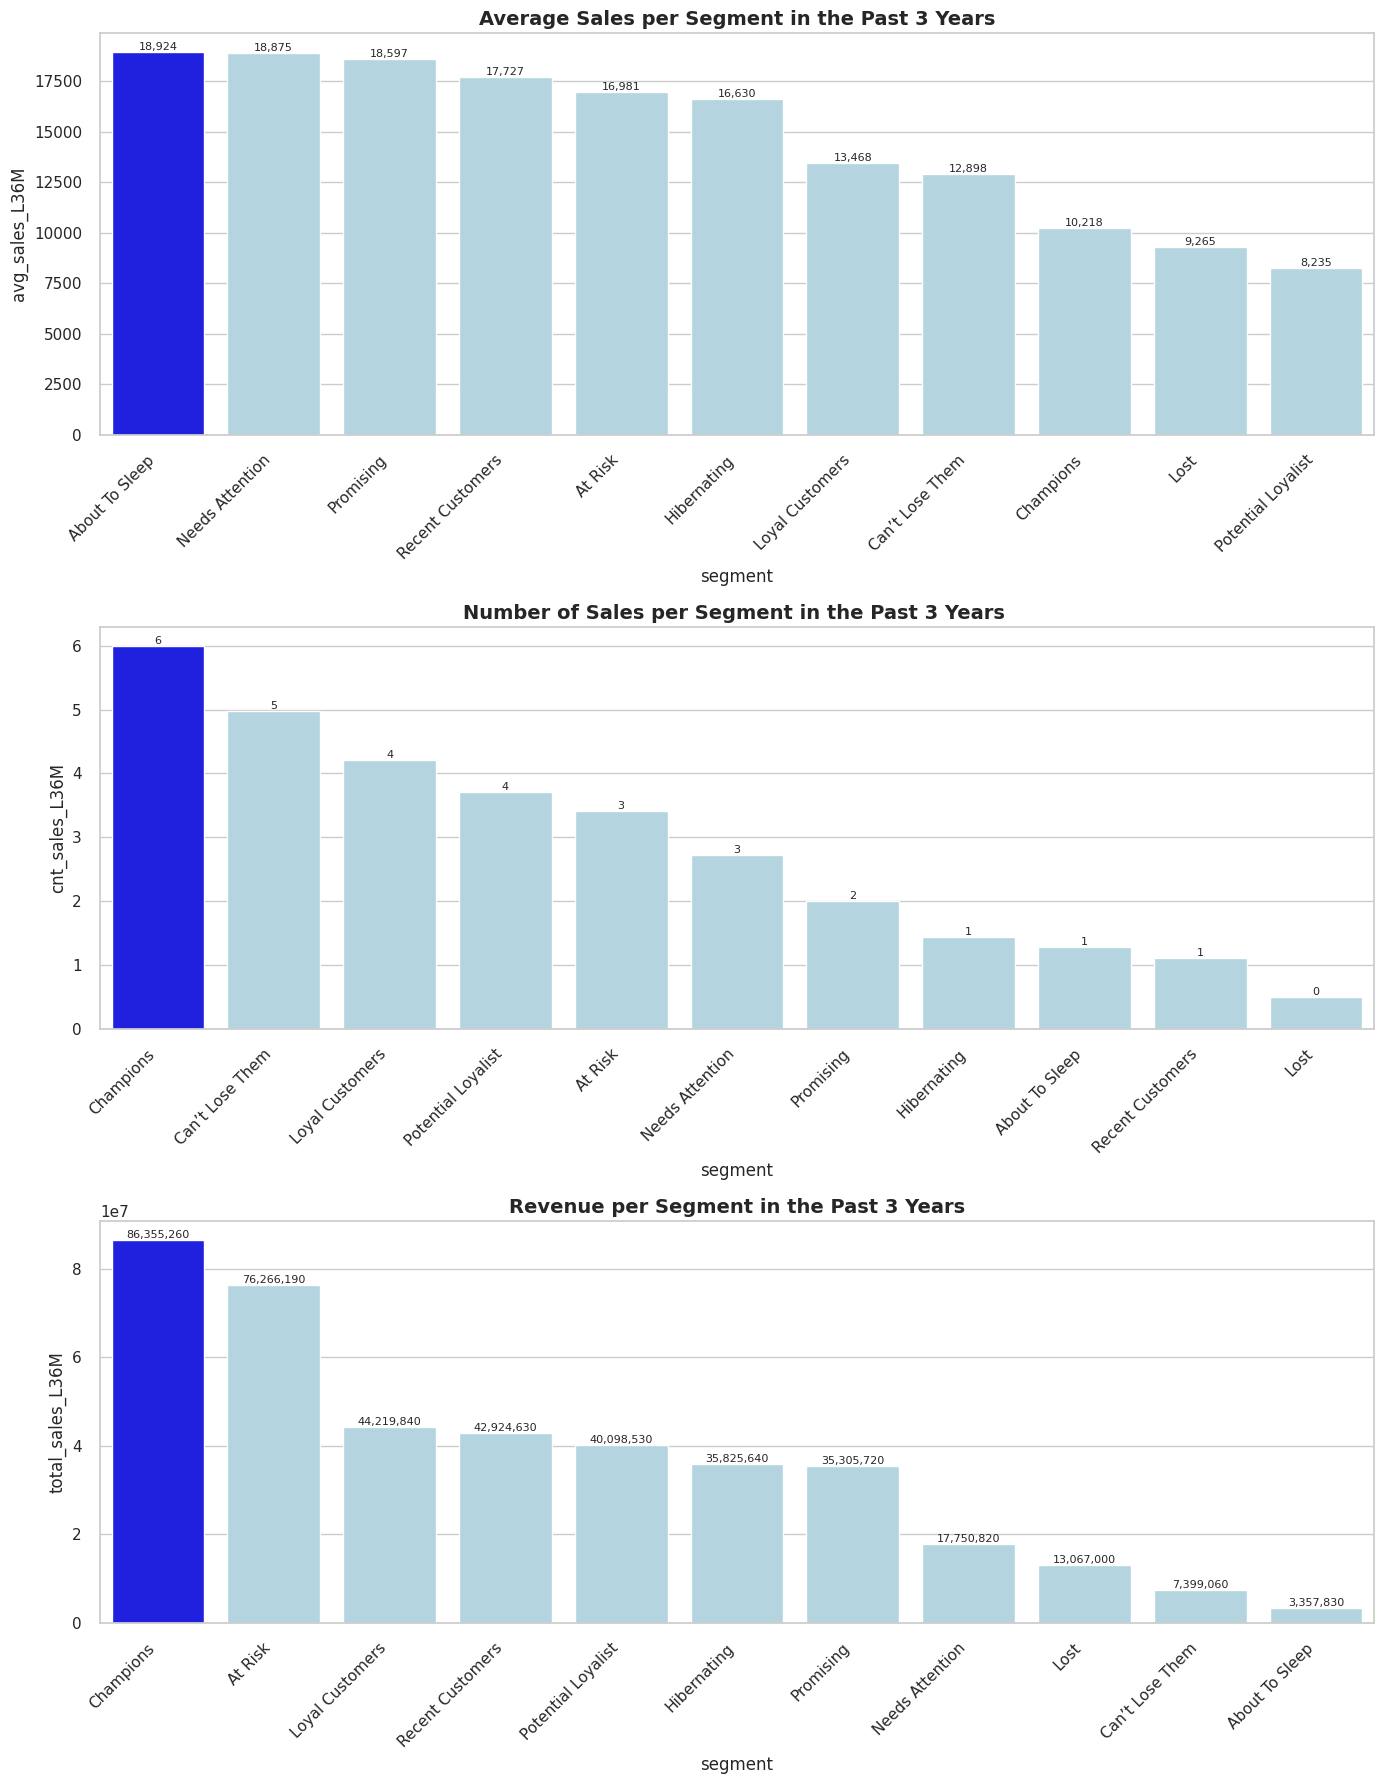

In [ ]:
# Define the columns to plot and their corresponding titles
columns = ['avg_sales_L36M', 'cnt_sales_L36M', 'total_sales_L36M']
titles = ['Average Sales per Segment in the Past 3 Years', 'Number of Sales per Segment in the Past 3 Years ', 'Revenue per Segment in the Past 3 Years']

# Set Seaborn style for a clean look
sns.set(style="whitegrid")

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(14, 18), tight_layout=True)

# Loop through each column and corresponding title
for ax, col, title in zip(axes, columns, titles):
    # Sort data in descending order based on the column
    # Keep the original index containing segment names
    sorted_df = sales_per_segment.sort_values(by=col, ascending=False)

    # Set bar color: blue for the max value, lightblue for others
    colors = ['blue' if x == sorted_df[col].max() else 'lightblue' for x in sorted_df[col]]

    # Create barplot using Seaborn, using the index for the x-axis
    sns.barplot(x=sorted_df.index, y=col, data=sorted_df, ax=ax, palette=colors)

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Set title with bold font
    ax.set_title(title, fontweight='bold', fontsize=14)
    #                 ^^^^^^^^^^^^^^^^^^^

    # Add value labels on top of each bar
    for i, val in enumerate(sorted_df[col]):
        ax.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=8)

# Show the full plot
plt.show()

In [ ]:
# Analyze a proportion for segment that have no sales
# Group cnt_user by sales_status_L36M	and segment
segment_activity = df2.groupby(['sales_status_L36M','segment'])['account_id'].count().reset_index().rename(columns={'account_id': 'cnt_user'})
segment_activity

sales_status_L36M             segment  cnt_user
0             Active      About To Sleep       160
1             Active             At Risk      1556
2             Active     Can’t Lose Them       132
3             Active           Champions      1504
4             Active         Hibernating      1664
5             Active                Lost       661
6             Active     Loyal Customers       849
7             Active     Needs Attention       359
8             Active  Potential Loyalist      1483
9             Active           Promising       955
10            Active    Recent Customers      2282
11          Inactive         Hibernating         6
12          Inactive                Lost       735
13          Inactive    Recent Customers         9

In [ ]:
# Filter only the segment that have no sales
segment_inactive = segment_activity[segment_activity['sales_status_L36M'] =='Inactive']
segment_inactive

sales_status_L36M           segment  cnt_user
11          Inactive       Hibernating         6
12          Inactive              Lost       735
13          Inactive  Recent Customers         9

In [ ]:
# Create a proportion for segment that have no sales
segment_inactive['proportion'] = segment_inactive['cnt_user']/segment_inactive['cnt_user'].sum()
segment_inactive

<ipython-input-139-9e1ebd28fe66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_inactive['proportion'] = segment_inactive['cnt_user']/segment_inactive['cnt_user'].sum()


sales_status_L36M           segment  cnt_user  proportion
11          Inactive       Hibernating         6       0.008
12          Inactive              Lost       735       0.980
13          Inactive  Recent Customers         9       0.012

In [ ]:
# Sort
segment_inactive = segment_inactive.sort_values('proportion', ascending=False)

# Display the sorted proportions
segment_inactive

sales_status_L36M           segment  cnt_user  proportion
12          Inactive              Lost       735       0.980
13          Inactive  Recent Customers         9       0.012
11          Inactive       Hibernating         6       0.008

<ipython-input-141-1ff337fa7d85>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_inactive, x='segment', y='proportion', palette=colors)


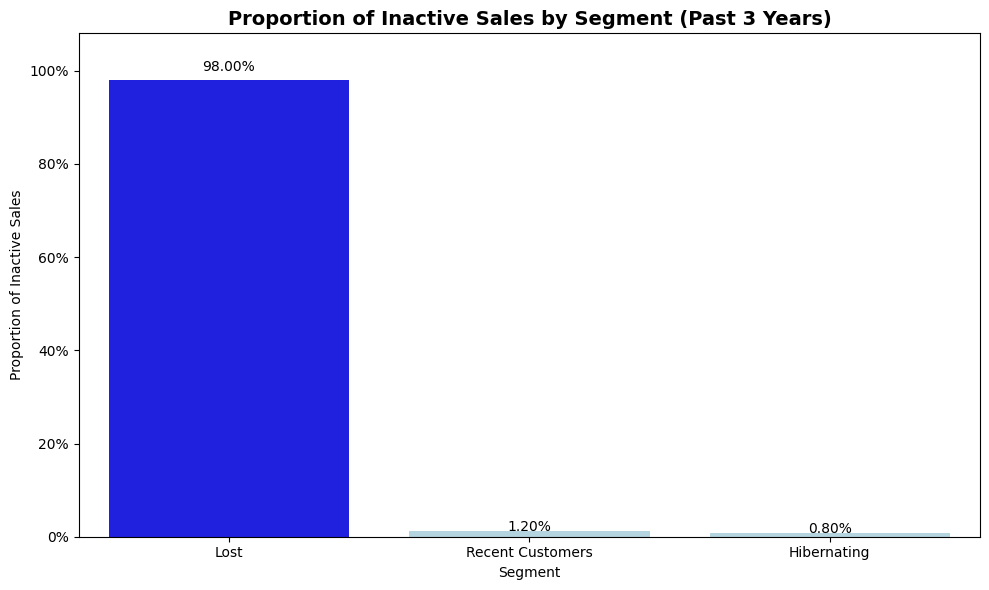

In [ ]:
# Ensure correct order
order = ['Lost', 'Recent Customers', 'Hibernating']
segment_inactive['segment'] = pd.Categorical(segment_inactive['segment'], categories=order, ordered=True)

# Set bar colors (highlight max)
colors = ['blue' if x == segment_inactive['proportion'].max() else 'lightblue' for x in segment_inactive['proportion']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_inactive, x='segment', y='proportion', palette=colors)

# Add % labels (with dynamic offset)
for i, val in enumerate(segment_inactive['proportion']):
    offset = val * 0.02  # Adjust 0.02 for optimal spacing
    plt.text(i, val + offset, f'{val*100:.2f}%', ha='center', fontsize=10)

plt.title('Proportion of Inactive Sales by Segment (Past 3 Years)', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Inactive Sales')
plt.xlabel('Segment')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))

# Adjust y-axis limits to accommodate labels
plt.ylim(0, segment_inactive['proportion'].max() + 0.1)  # Adjust 0.1 for optimal spacing

plt.tight_layout()
plt.show()

ternyata ada 3 segment yang memiliki user that have no sales:, top contributingnya adalah lost segment, secon recent customer and last hibernating.

# K-Mean Clustering

In this analysis, we initially used common industry segments. Now, we'll use K-means clustering to create better segments tailored to RevoBank's customers.
Why K-means is better than RFM here:
- K-means finds hidden patterns in our data to create more accurate and relevant segments.
- RFM uses general categories that might not fit our customers perfectly.
- K-means is more flexible and can use more customer information than RFM.-

In [ ]:
#Import library
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # Feature scaling
from sklearn.cluster import KMeans # k-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet yang berguna dalam proses clustering

# Pengaturan untuk menghilangkan warning (biar notebook bersih saja, optional)
import warnings
warnings.filterwarnings("ignore")

# Pengaturan tema seaborn (optional)
sns.set_style('whitegrid')

**1. Select numeric column in our data**

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12355 non-null  object        
 1   account_activity_level   12355 non-null  object        
 2   customer_value_level     12355 non-null  object        
 3   MOB                      12355 non-null  int64         
 4   flag_female              12355 non-null  int64         
 5   avg_sales_L36M           12355 non-null  float64       
 6   cnt_sales_L36M           12355 non-null  int64         
 7   last_sales               12355 non-null  float64       
 8   month_since_last_sales   12355 non-null  int64         
 9   count_direct_promo_L12M  12355 non-null  int64         
 10  birth_date               12355 non-null  datetime64[ns]
 11  client_age               12355 non-null  int64         
 12  total_sales_L36M         12355 non-nu

In [ ]:
# Step 1: Select only numeric columns
df_kmean = df.select_dtypes(include=np.number)
print(df.head())

  account_id account_activity_level customer_value_level  MOB  flag_female  \
0  100000006                      X                    A   91            0   
1  100000038                      X                    A   69            0   
2  100000382                      X                    A  123            1   
3  100000612                      X                    A   84            1   
4  100000757                      X                    A   40            0   

   avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0         25000.0               1     25000.0                      26   
1          9000.0               5     10000.0                      25   
2         17330.0               6     20000.0                      18   
3         25830.0               6     25000.0                      14   
4         25000.0               3     25000.0                      17   

   count_direct_promo_L12M birth_date  client_age  total_sales_L36M  \
0                    

In [ ]:
df_kmean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12355 entries, 0 to 12558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MOB                      12355 non-null  int64  
 1   flag_female              12355 non-null  int64  
 2   avg_sales_L36M           12355 non-null  float64
 3   cnt_sales_L36M           12355 non-null  int64  
 4   last_sales               12355 non-null  float64
 5   month_since_last_sales   12355 non-null  int64  
 6   count_direct_promo_L12M  12355 non-null  int64  
 7   client_age               12355 non-null  int64  
 8   total_sales_L36M         12355 non-null  float64
 9   profit                   12355 non-null  float64
 10  birth_year               12355 non-null  int32  
 11  recency                  12355 non-null  int64  
 12  frequency                12355 non-null  int64  
 13  monetary                 12355 non-null  float64
dtypes: float64(5), int32(1), in

In [ ]:
# Drop the columns before selecting numeric types for k-means clustering
df_kmean = df.drop(columns=['flag_female', 'recency', 'frequency', 'monetary'])

# Now select the remaining numeric features for k-means
df_kmean = df_kmean.select_dtypes(include=np.number)
print(df_kmean.head())

   MOB  avg_sales_L36M  cnt_sales_L36M  last_sales  month_since_last_sales  \
0   91         25000.0               1     25000.0                      26   
1   69          9000.0               5     10000.0                      25   
2  123         17330.0               6     20000.0                      18   
3   84         25830.0               6     25000.0                      14   
4   40         25000.0               3     25000.0                      17   

   count_direct_promo_L12M  client_age  total_sales_L36M   profit  birth_year  
0                        5          26           25000.0   600.00        1996  
1                       10          52           45000.0  1080.00        1971  
2                        6          70          103980.0  2495.52        1953  
3                        7          25          154980.0  3719.52        1997  
4                        5          33           75000.0  1800.00        1989  


**2. Spike our idea using scatterplot and pairplot**

<Axes: xlabel='client_age', ylabel='avg_sales_L36M'>

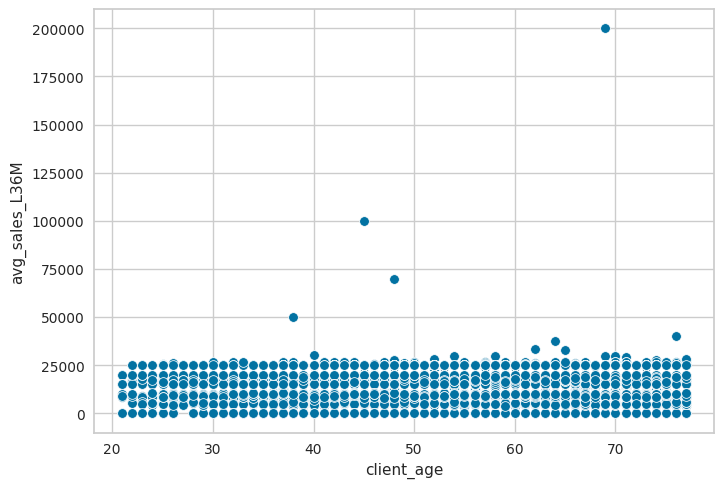

In [ ]:
# Step 2 : create scatterplot and pairplot
sns.scatterplot(data=df_kmean, x = 'client_age', y = 'avg_sales_L36M')

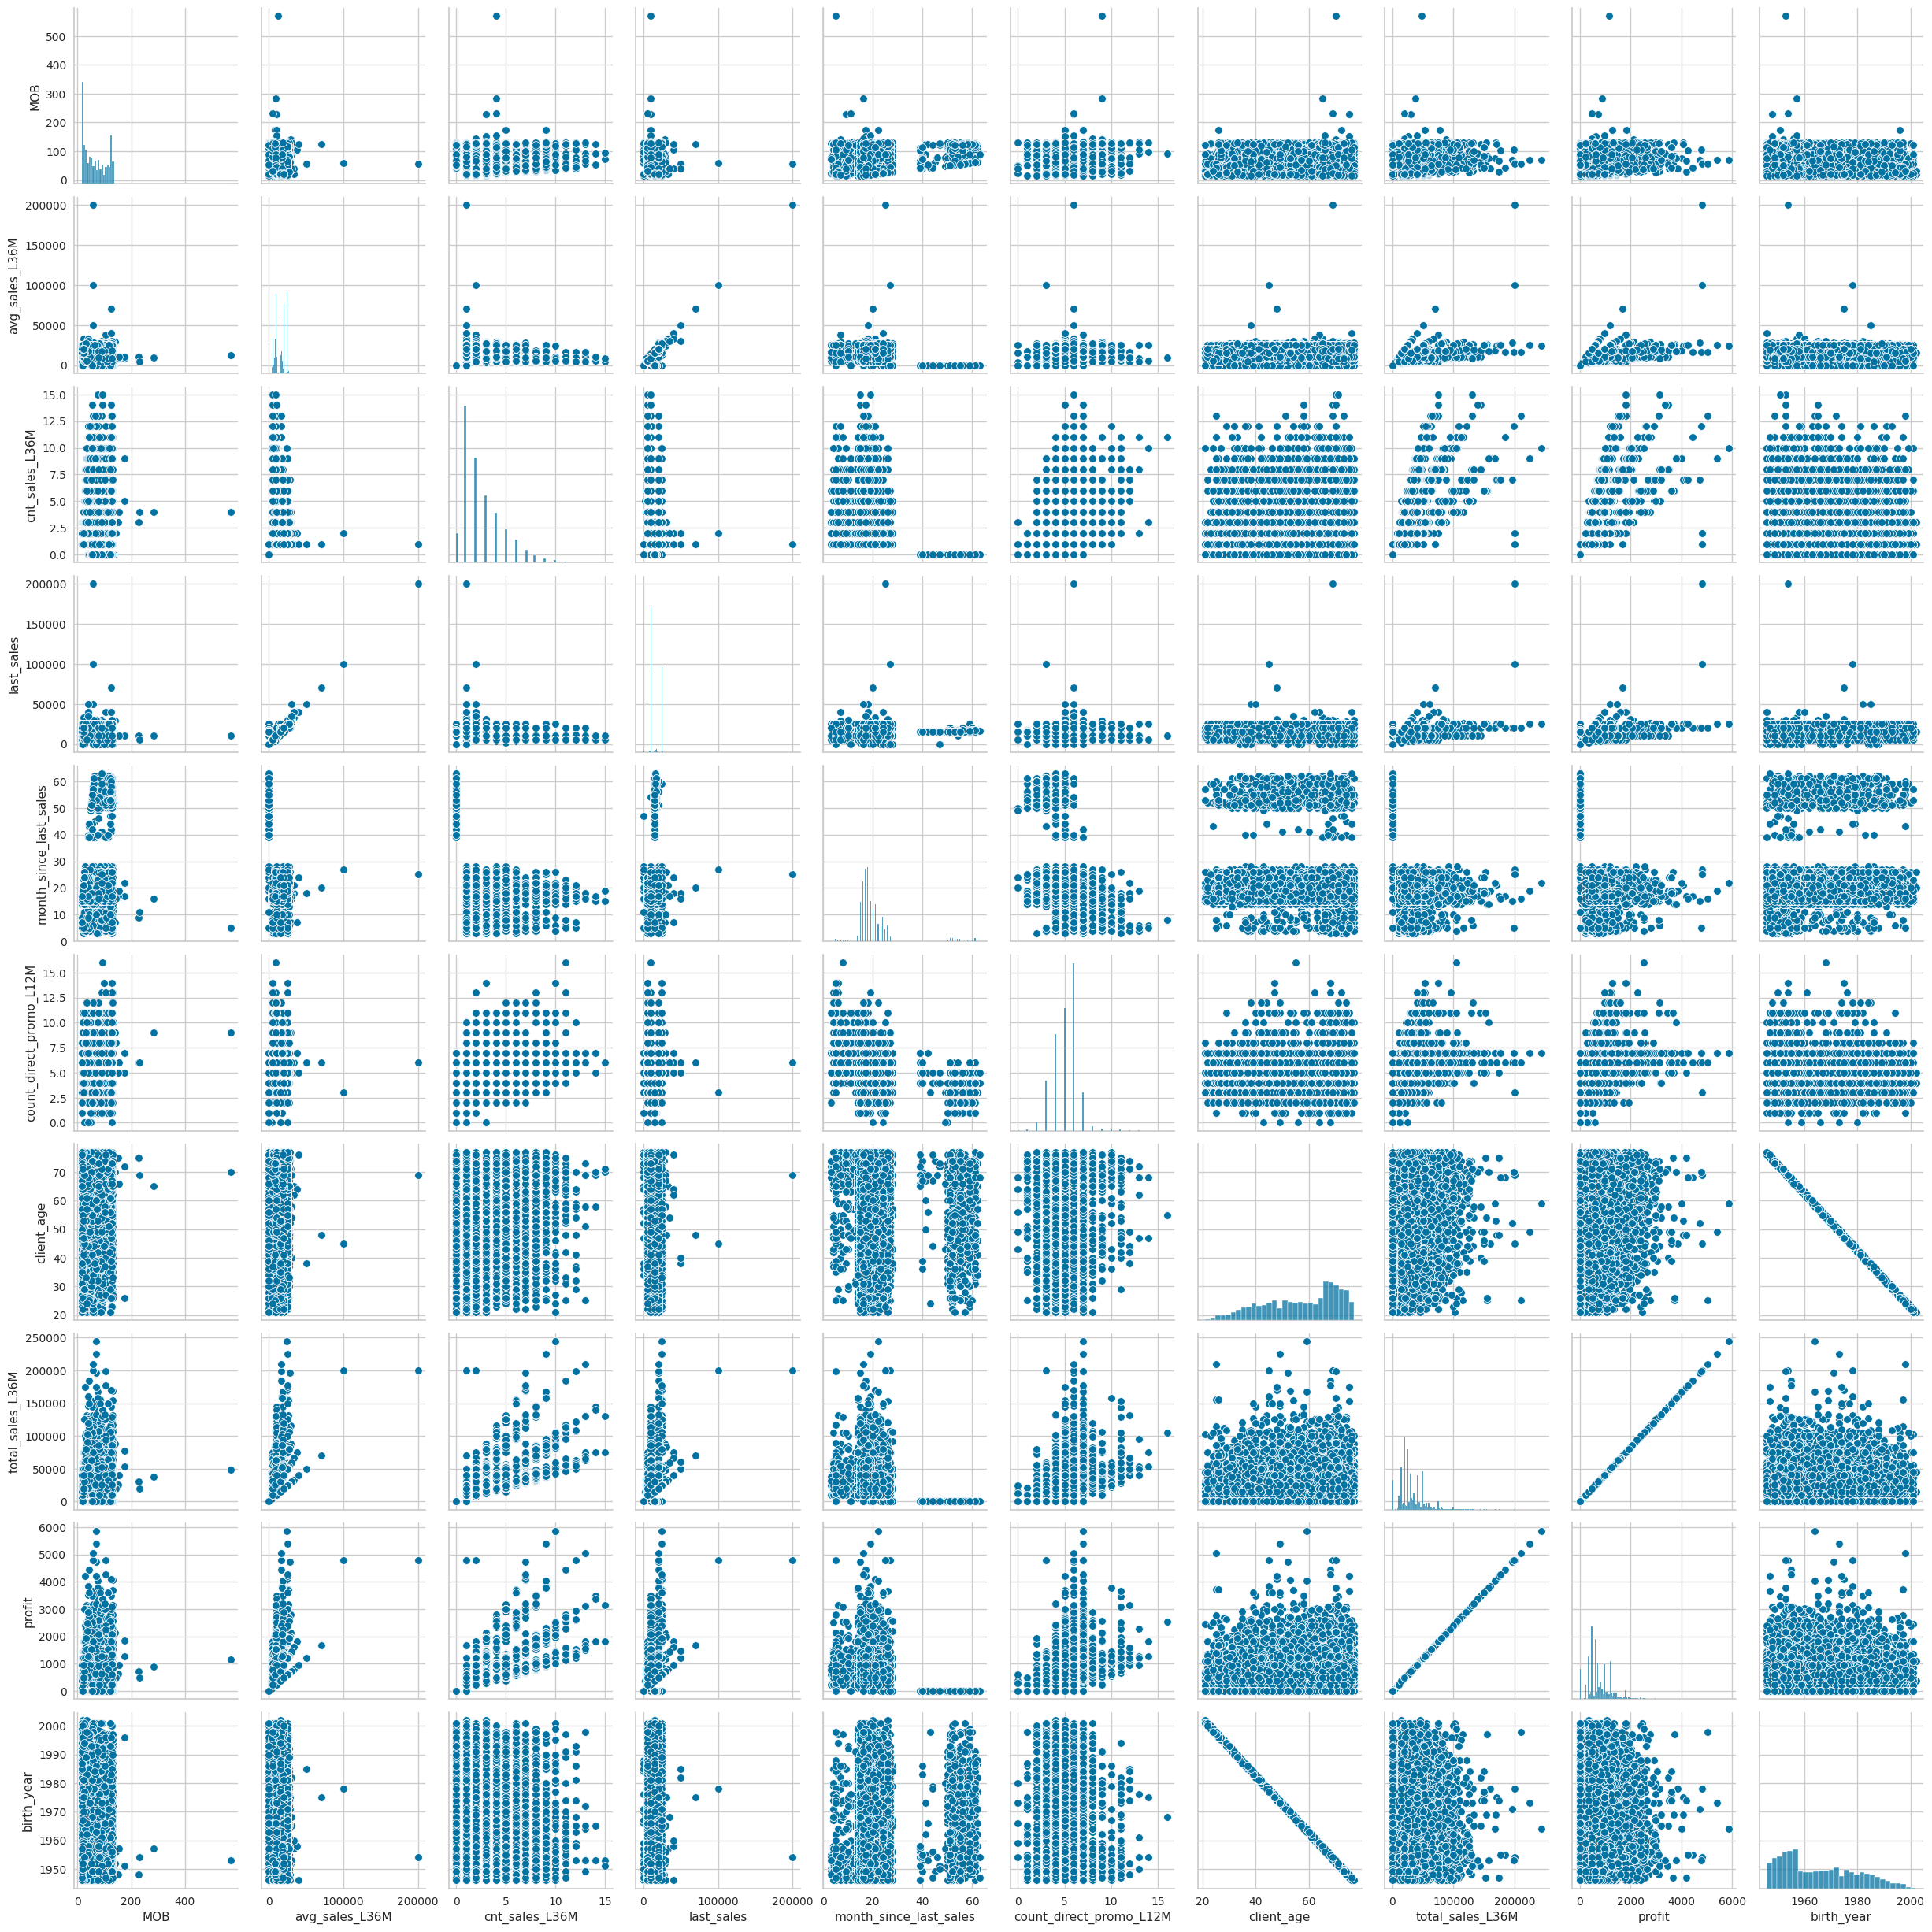

In [ ]:
sns.pairplot(df_kmean)

remove outlier

In [ ]:
# Remove outlier
Q1 = df_kmean['avg_sales_L36M'].quantile(0.25)
Q3 = df_kmean['avg_sales_L36M'].quantile(0.75)
IQR = Q3 - Q1

# batas bawah & atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter data yang *bukan* outlier
df_no_outliers = df_kmean[(df_kmean['avg_sales_L36M'] >= lower_bound) & (df_kmean['avg_sales_L36M'] <= upper_bound)]
df_no_outliers

MOB  avg_sales_L36M  cnt_sales_L36M  last_sales  \
0       91         25000.0               1     25000.0   
1       69          9000.0               5     10000.0   
2      123         17330.0               6     20000.0   
3       84         25830.0               6     25000.0   
4       40         25000.0               3     25000.0   
...    ...             ...             ...         ...   
12554   21         15000.0               1     15000.0   
12555   19         20000.0               1     20000.0   
12556   21         20000.0               1     20000.0   
12557   17         20000.0               2     20000.0   
12558   21         20000.0               2     20000.0   

       month_since_last_sales  count_direct_promo_L12M  client_age  \
0                          26                        5          26   
1                          25                       10          52   
2                          18                        6          70   
3                          14                        7          25   
4                          17                        5          33   
...                       ...                      ...         ...   
12554                      21                        3          53   
12555                      19                        4          71   
12556                      21                        4          41   
12557                      17                        6          47   
12558                      21                        5          47   

       total_sales_L36M   profit  birth_year  
0               25000.0   600.00        1996  
1               45000.0  1080.00        1971  
2              103980.0  2495.52        1953  
3              154980.0  3719.52        1997  
4               75000.0  1800.00        1989  
...                 ...      ...         ...  
12554           15000.0   360.00        1970  
12555           20000.0   480.00        1952  
12556           20000.0   480.00        1981  
12557           40000.0   960.00        1975  
12558           40000.0   960.00        1975  

[12349 rows x 10 columns]

dari 12355 menjadi 12349, teremove 6 baris

<Axes: xlabel='client_age', ylabel='avg_sales_L36M'>

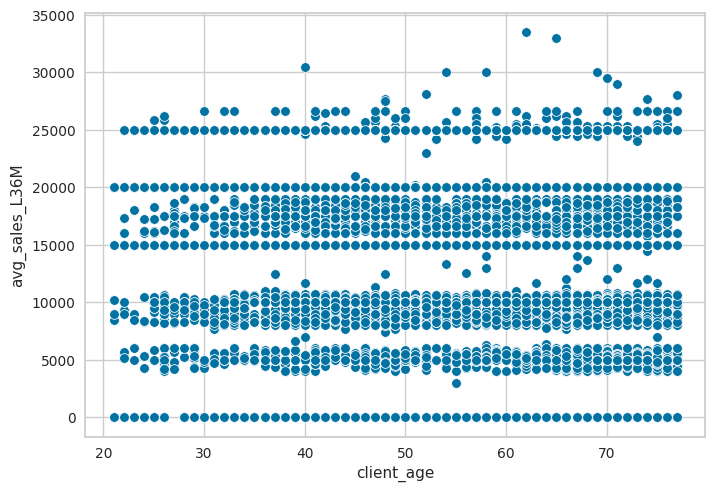

In [ ]:
sns.scatterplot(data=df_no_outliers, x = 'client_age', y = 'avg_sales_L36M')

**3. Data scaling using standard scaler**

In [ ]:
# Step 3: Data scaling using standard scaler
scaler = StandardScaler () #define scaler that we wanna use
scaler.fit(df_kmean) #asking scaler to learning our data
df_ss = pd.DataFrame ( # asking scaler to read our data
    scaler.transform (df_kmean), columns=df_kmean.columns
)

In [ ]:
# Check to result
df_ss. describe()

MOB  avg_sales_L36M  cnt_sales_L36M    last_sales  \
count  1.235500e+04    1.235500e+04    1.235500e+04  1.235500e+04   
mean   7.677657e-17    1.161713e-16   -3.450632e-17 -8.425294e-17   
std    1.000040e+00    1.000040e+00    1.000040e+00  1.000040e+00   
min   -1.212787e+00   -1.882107e+00   -1.269192e+00 -2.309284e+00   
25%   -9.891214e-01   -6.706885e-01   -7.907523e-01 -8.216628e-01   
50%   -2.187175e-01    9.949349e-02   -3.123123e-01 -7.785225e-02   
75%    9.493144e-01    7.600269e-01    6.445677e-01  6.659583e-01   
max    1.260478e+01    2.453923e+01    5.907408e+00  2.744314e+01   

       month_since_last_sales  count_direct_promo_L12M    client_age  \
count            1.235500e+04             1.235500e+04  1.235500e+04   
mean            -1.952483e-16             1.886346e-16  1.383129e-16   
std              1.000040e+00             1.000040e+00  1.000040e+00   
min             -1.920585e+00            -3.798909e+00 -2.577906e+00   
25%             -4.055967e-01            -8.221833e-01 -7.877741e-01   
50%             -2.973833e-01            -7.800201e-02  1.430947e-01   
75%              2.725699e-02             6.661793e-01  8.591476e-01   
max              4.572221e+00             8.107992e+00  1.431990e+00   

       total_sales_L36M        profit    birth_year  
count      1.235500e+04  1.235500e+04  1.235500e+04  
mean       8.396539e-17  2.875527e-17 -7.250354e-15  
std        1.000040e+00  1.000040e+00  1.000040e+00  
min       -1.540258e+00 -1.540258e+00 -1.395160e+00  
25%       -5.948393e-01 -5.948393e-01 -8.934345e-01  
50%       -2.166717e-01 -2.166717e-01 -1.766843e-01  
75%        4.451217e-01  4.451217e-01  7.550910e-01  
max        1.001276e+01  1.001276e+01  2.618642e+00

In [ ]:
df_ss.drop(columns =['flag_female'], inplace=True)

KeyError: "['flag_female'] not found in axis"

In [ ]:
df_kmean.drop(columns =['flag_female'], inplace=True)

In [ ]:
df_kmean.info()

In [ ]:
df_ss.describe()

In [ ]:
df_ss.head()

In [ ]:
df_kmean_backup = df_kmean.copy()

In [ ]:
df_ss_backup = df_ss.copy()

In [ ]:
df_ss

**4. Determining Number of Clusters using Elbow Method**






In [ ]:
# Step 4: for each n_clusters betweem 1 and 15, we calculate the distortion value
distortions_1 = []
K_1 = range(1, 15)
for n_clusters in K_1:
  model1 = KMeans (n_clusters, random_state = 1000, n_init = 'auto')
  model1.fit (df_ss[['MOB','avg_sales_L36M','cnt_sales_L36M','last_sales','month_since_last_sales','count_direct_promo_L12M','client_age','total_sales_L36M','profit']])
  distortions_1.append(model1.inertia_)
  print(f'For k = {n_clusters}, distortion = {model1.inertia_}') # Print inside the loop

In [ ]:
# Create plot
plt.figure(figsize=(16, 8))
plt.figure()
plt.plot(K_1, distortions_1, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We will look for the point, k, where the value of inertia (distortion) begins to plateau or its decrease is no longer significant.

There are many potential elbows here: maybe k=2, k=6, etc.

To be more certain, we need also to look into the silhouette plot.

**5. Determining Number of Clusters using Silhouette Analysis**

Poin-poin untuk membaca silhouette score:

* Pilih yang skor-nya tinggi
* Pilih yang proporsi antar cluster mirip (luasannya antar cluster)
* Pilih yang negatifnya sedikit
* Usahakan pilih yang hasil plotnya tebal-tebal (ini kriteria terakhir dan bisa disebut optional, digunakan kalo poin 1-3 terpenuhi semua, untuk memilih kita gunakan kriteria 4)

In [ ]:
# Step 5: silhoutte score plot
K_2 = range(2, 15)
max_K_2 = max( K_2)
fig,ax = plt.subplots(int(np.ceil(max_K_2/2)), figsize = (15,30))

for n_clusters in K_2:
  model2 = KMeans (n_clusters, random_state = 1000, n_init = 'auto')
  model2.fit (df_ss[['MOB','avg_sales_L36M','cnt_sales_L36M','last_sales','month_since_last_sales','count_direct_promo_L12M','client_age','total_sales_L36M','profit']])

  q,mod = divmod(n_clusters, 2)
  sil = SilhouetteVisualizer(model2, is_fitted=True, ax=ax[q-1][mod])
  sil.fit(df_ss[['MOB','avg_sales_L36M','cnt_sales_L36M','last_sales','month_since_last_sales','count_direct_promo_L12M','client_age','total_sales_L36M','profit']])
  sil.finalize()
  print(f'For k = {n_clusters},the average silhouette score = {sil.silhouette_score_}')

In [ ]:
# Step 5: silhoutte score plot
K_2 = range(2, 15)
max_K_2 = max(K_2)
# Creating a grid of subplots with enough rows and columns
# nrows is calculated to fit all plots, ncols is fixed to 2
nrows = int(np.ceil(max_K_2 / 2))
fig, ax = plt.subplots(nrows, 2, figsize=(15, 30))

for n_clusters in K_2:
    model2 = KMeans(n_clusters, random_state=1000, n_init='auto')
    model2.fit(df_ss[['MOB', 'avg_sales_L36M', 'cnt_sales_L36M', 'last_sales', 'month_since_last_sales', 'count_direct_promo_L12M', 'client_age', 'total_sales_L36M', 'profit']])

    # Calculate the row and column index for the current subplot
    # Using divmod to get the quotient and remainder when dividing by 2
    q, mod = divmod(n_clusters -2 , 2) # Subtracting 2 from n_clusters to adjust for the range starting from 2

    # Passing the correct Axes object to SilhouetteVisualizer
    sil = SilhouetteVisualizer(model2, is_fitted=True, ax=ax[q, mod])
    sil.fit(df_ss[['MOB', 'avg_sales_L36M', 'cnt_sales_L36M', 'last_sales', 'month_since_last_sales', 'count_direct_promo_L12M', 'client_age', 'total_sales_L36M', 'profit']])
    sil.finalize()
    print(f'For k = {n_clusters}, the average silhouette score = {sil.silhouette_score_}')

berdasarkan dari elbow method kita prediksi bahwa n_cluster antara k= 2 - k=6

lalu kita melakukan silhoutte analysis, dari hasil pengamatan kita didapatkan bahwa:
1. k =2 dan k = 3 yang memiliki rata-rata skor silhoutte tertinggi
2. jika dilihat dari proporsi luasan antar cluster yang cukup mirip adala k=2, karena k=3 memiliki 1 cluster yang luasannya jauh lebih kecil dibandingkan 2 cluster lainnya
3. jika dilihat dari k yang miliki negatif paling sedikit, k = 2 memiliki luasan negatif yang lebih sedikit dibandingkan k = 3

maka diputuskan kita akan menggunakan k = 2

**6. Interpreting clustering result**

In [ ]:
# Step 6: create the final cluster model
# Initialize KMeans for 2 clusters
model2 = KMeans (n_clusters = 2, random_state = 1000, n_init = 'auto')
# Fit the model to the data
model2.fit(df_ss)
# Assign cluster result to new column, meminta mengeluarkan hasil masuk ke kelompok mana
df_ss['cluster']= model2.labels_

In [ ]:
# Pairplot
sns.pairplot(df_ss, hue = 'cluster')